### **Hotel Booking Demand Dataset**
**Dataset Source**: [kaggle.com](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)

**Created by:**

- M. Fauzi Hakim (JCDS-2304-004)
- Antonius Andriyanto (JCDS-2304-007)

**Contents overview:**

- Business Understanding
- Data Understanding
- Pra-Model Building (Preprocessing & Feature Engineering)
- Model Building & Testing
- Conclusion and Recommendation


<hr>

# <center>**Analisis Segmentasi Tamu & Prediksi Pembatalan Pemesanan Hotel**




<center><img src="https://www.algarveportugaltourism.com/images/hotels/vila-vita-parc-resort.jpeg" width="500" height="340"> <img src="https://static-new.lhw.com/HotelImages/Final/LW1311/lw1311_119463943_720x450.jpg" width="500" height="340"> </center>




<hr>

<hr>

## <center>**Business Understanding**

<hr>

***Stakeholder***: ***Revenue Manager*** dari Manajemen Hotel Tuvoli


> ### **Context**

Manajemen Hotel `Tuvoli` yang menjalankan *`City Hotel`* di Lisbon, Portugal dan *`Resort Hotel`* di Algrave, Portugal tengah mengalami tantangan signifikan dalam mengoptimalkan strategi pemesanan hotel mereka. Manajemen hotel tersebut berupaya untuk memaksimalkan tingkat hunian dan pendapatan sambil meminimalkan pembatalan pemesanan hotel mereka. Hal ini mendorong pihak manajemen Hotel `Tuvoli` meminta bantuan kepada konsultan data `BetaMachineLearning` untuk menganalisis data-data pemesanan kamar hotel yang mereka miliki dan menarik *insight* yang berguna untuk meningkatkan profitabilitas mereka. Analisis segmentasi tamu yang efektif dan analisis prediktif sangat penting untuk mencapai tujuan ini. 

Adanya analisis segmentasi tamu memungkinkan pihak manajamen hotel untuk mengelompokkan Tamu berdasarkan sejumlah karakteristik mereka. Informasi ini nantinya berkontribusi untuk memberikan *insight* mendalam tentang nilai Tamu berdasarkan perilaku mereka. Sementara itu, analisis prediktif menggunakan *machine learning* dalam memprediksi pembatalan pemesanan hotel berperan penting bagi pihak hotel karena memungkinkan mereka untuk secara proaktif mengelola risiko pembatalan pemesanan. Kedua analisis ini jika diintegrasikan secara bersamaan diharapkan mampu memaksimalkan pendapatan hotel.

> ### **Problem Statement**

Bagaimana pemanfaatan analisis segmentasi tamu dan pemanfaatan *Machine Learning* dalam memprediksi pembatalan pemesanan hotel secara efektif dapat mengoptimalkan strategi pemesanan hotel dan strategi manajemen profit secara keseluruhan?

> ### **Goals**

1. Analisis segmentasi tamu menggunakan metrik RFM bertujuan untuk:
    - mengidentifikasi dan menyegmentasi tamu berdasarkan perilaku pemesanan mereka menggunakan metrik RFM.
    - menentukan segmen tamu bernilai tinggi yang memberikan kontribusi signifikan terhadap pendapatan hotel.
    - mengembangkan strategi pemasaran yang ditargetkan untuk berbagai segmen tamu.

2. Analisis prediktif pembatalan pemesanan hotel bertujuan untuk:
    - membangun model prediktif untuk mengidentifikasi kemungkinan pembatalan pemesanan.
    - menerapkan langkah-langkah proaktif untuk mengurangi dampak pembatalan berdasarkan prediksi model.

> ### **Analytic Approach**

1. Analisis RFM:
   - mengidentifikasi prilaku tamu berdasarkan terakhir kali melakukan transaksi (Recency), seberapa sering melakukan transaksi (Frequency) dan berapa banyak uang yang dihabiskan (Monetary).
   - Menyegmentasi tamu ke dalam berbagai kategori RFM (misalnya, bernilai tinggi, sering, baru, dan berisiko).

2. Analisis prediktif menggunakan *Machine Learning*:
   - Memilih fitur yang terkait dengan pembatalan pemesanan.
   - Melatih model *Machine Learning* dengan algoritma yang paling efektif untuk memprediksi pembatalan pemesanan.
   - Mengevaluasi kinerja model menggunakan metrik evaluasi yang telah ditentukan.

3. Integrasi dan Pengembangan Strategi:
   - Menggabungkan wawasan dari analisis RFM dan prediksi pembatalan.
   - Mengembangkan strategi untuk melibatkan tamu bernilai tinggi dan mengurangi pembatalan.
   - Menerapkan kampanye pemasaran yang ditargetkan dan memantau efektivitasnya.

> ### **Metric Evaluation**


![image.png](https://www.researchgate.net/publication/328148379/figure/fig1/AS:679514740895744@1539020347601/Model-performance-metrics-Visual-representation-of-the-classification-model-metrics.png)

- *(TP) True Positive*: Tamu diprediksi (predict) cancel dan kenyataannya (actual) benar-benar cancel.
- *(FP) False Positive*: Tamu diprediksi (predict) cancel, tapi kenyataannya (actual) tidak cancel.
- *(TN) True Negative*: Tamu diprediksi (predict) tidak cancel dan kenyataannya (actual) tidak cancel.
- *(FN) False Negative*: Tamu diprediksi (predict) tidak cancel, tapi kenyataannya (actual) cancel.

**Error Types:**

1. Type 1 error : False Positive

Konsekuensi : tamu yang seharusnya tidak *cancel* akan dianggap *cancel* tentunya ini akan membuat kekecewaan dari tamu terhadap pelayanan hotel apabila kamar tidak tersedia akibat *overbook*.

2. Type 2 error : False Negative

Konsekuensi : tamu yang seharusnya *cancel* akan dianggap tidak *cancel* tentunya ini akan membuat kerugian bagi perusahaan di bidang hotel tersebut.

Berdasarkan *problem statement* dan *goals* dari analisis ini, maka prioritas utamanya adalah memastikan bahwa model *machine learning* dapat memprediksi setiap pembatalan yang mungkin terjadi  dengan ketepatan yang tinggi. Dengan keperluan untuk mempertimbangkan keharmonisan prediksi seperti F1-score tetapi lebih menekankan pada pengurangan Type I error (false positive) atau lebih fokus pada recall, **maka F2-score menjadi pilihan yang baik**.

F2-score merupakan varian dari F1 score yang memberikan bobot lebih pada recall daripada precision.Penggunaan F2-score dalam konteks prediksi pembatalan pemesanan hotel mencerminkan strategi bisnis yang memprioritaskan meminimalkan Type 2 error (false negative)—yang berarti memastikan bahwa Anda memprediksi sebanyak mungkin pembatalan yang sebenarnya.


<hr>

## <center> **Data Understanding**

<hr>

In [6]:
# Data Manipulation
import pandas as pd
import numpy as np
import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from category_encoders import BinaryEncoder

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, RandomizedSearchCV, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, mean_squared_error, recall_score, precision_score, f1_score, precision_recall_curve, roc_curve
from sklearn.metrics import make_scorer, fbeta_score, roc_auc_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay

# Algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans

# Feature Selection
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_regression

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from imblearn.pipeline import Pipeline as ImbPipeline

# Imbalance Methods
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import TransformedTargetRegressor

# Statistics
from scipy.stats import normaltest, chi2_contingency

# Miscellaneous
from termcolor import colored
import lightgbm as lgb
import pickle
import shap

# Warning Handling
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

# Maximizing Columns and Columns Width
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 1)


> ### **Data Overall**

Dataset ***Hotel Booking Demand*** ini berasal dari sebuah [artikel ilmiah](https://www.sciencedirect.com/science/article/pii/S2352340918315191) yang ditulis oleh Nuno Antonio, Ana Almeida dan Luis Nunes dalam jurnal ***Data in Brief*** pada tahun 2019. Dataset ini mulanya berjumlah **2 buah dataset**, yaitu **dataset *city hotel*** yang merujuk ke salah satu hotel di Lisbon, Portugal dan **dataset *resort hotel*** yang merujuk ke salah satu hotel di Algarve, Portugal.

*Dataset* ini mencakup pemesanan hotel antara tanggal 1 Juli 2015 dan 31 Agustus 2017. Struktur *dataset* ini memiliki 32 kolom dan setiap barisnya merepresentasikan pemesanan hotel. Di karenakan *dataset* ini merupakan data hotel yang riil, semua elemen yang berkaitan dengan identitas hotel atau pemesan telah disamarkan karena alasan anonimitas seperti ID dalam kolom ***agent*** dan ***company***.



In [8]:
# membaca dan menampilkan dataset
df=pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
# menampilkan infomasi struktur dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

> ### **Structure of Dataset Hotel Booking Demand**

Output **df.info()** untuk dataset ***hotel booking demand*** menunjukan bahwa dataset terdiri atas 119.390 *entries* data dalam 32 kolom, masing-masing kolom mewakili aspek-aspek yang berbeda dari pemesanan layanan hotel. 

Dataset ini mencakup berbagai jenis data, dengan campuran tipe data objek (data tekstual), bilangan bulat dan bilangan pecahan dengan pesebaran sebagai berikut:

- **Data-data Kategorik** (`object`): `hotel`, `arrival_date_month`, `meal`, `country`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `customer_type`, `reservation_status`, dan `reservation_status_date`. Kolom-kolom tersebut memberikan detail yang kaya tentang jenis hotel, tanggal kedatangan, tipe makanan, negara asal tamu, segmen pasar, saluran distribusi, tipe kamar yang dipesan dan yang diberikan, tipe deposit, tipe pelanggan, status reservasi, dan tanggal status reservasi. Jumlah *entries non-null* data mengindikasi kelengkapan data. 
Kolom-kolom ini berisi nilai non-null untuk semua atau sebagian besar *entries* data.

- **Data-data Numerik Diskrit** (`int64`): Kolom-kolom seperti `is_canceled`, `lead_time`, `arrival_date_year`, `arrival_date_week_number`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `is_repeated_guest`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, `total_of_special_requests`, dan `agent`, `company` memiliki tipe data berupa bilangan bulat yang menggambarkan informasi pemesanan, jumlah tamu, jumlah malam menginap, status tamu, perubahan pemesanan, jumlah permintaan khusus, dan pengidentifikasi agen serta perusahaan. Sejumlah kolom terindikasi memiliki data yang hilang berdasarkan jumlah *entries non-null* data pada kolom terkait.

- **Data-data Numerik Kontinu** (`float64`): Kolom `adr` (Average Daily Rate), yang menunjukkan data jumlah pembayaran per hari. Ini penting untuk analisis keuangan dan penilaian pendapatan.

Sejumlah kolom yang terindikasi memiliki data yang hilang karena jumlah non-null kurang dari total *entries* data adalah `children`, `country`, `agent` dan `company`. Kolom-kolom tersebut memerlukan perlakuan tertentu pada *data pre-process* guna menghasilkan analisis yang komprehensif dan meningkatkan efektivitas model.


> ### **Attribute Information**
Dalam dataset ini terdapat beberapa kolom informasi mengenai :

| *`Attribute`*                        | *Description* |
|--------------------------------------|---------------|
| `hotel`                            | Tipe hotel yang dipesan, bisa berupa 'City Hotel' atau 'Resort Hotel'. |
| `is_canceled`                      | Indikator apakah pemesanan dibatalkan (1) atau tidak (0). |
| `lead_time`                        | Selisih hari antara jadwal *check-in* dan tanggal pemesanan. |
| `arrival_date_year`                | Tahun jadwal *check-in* tamu. |
| `arrival_date_month`               | Bulan jadwal *check-in* tamu. |
| `arrival_date_week_number`         | Nomor minggu dalam setahun dari jadwal *check-in* tamu. |
| `arrival_date_day_of_month`        | Tanggal jadwal *check-in* tamu. |
| `stays_in_weekend_nights`          | Jumlah malam pada akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan untuk menginap di hotel. |
| `stays_in_week_nights`             | Jumlah malam pada hari kerja (Senin hingga Jumat) tamu menginap atau memesan untuk menginap di hotel. |
| `adults`                           | Jumlah orang dewasa. |
| `children`                         | Jumlah anak-anak. |
| `babies`                           | Jumlah bayi. |
| `meal`                             | Tipe makanan yang dipesan. |
| `country`                          | Negara asal tamu. |
| `market_segment`                   | Penamaan segmen pasar. |
| `distribution_channel`             | Saluran distribusi pemesanan. |
| `is_repeated_guest`                | Indikator apakah tamu pernah menginap sebelumnya (1) atau tidak (0). |
| `previous_cancellations`           | Jumlah pemesanan sebelumnya yang telah dibatalkan oleh tamu. |
| `previous_bookings_not_canceled`   | Jumlah pemesanan sebelumnya yang tidak dibatalkan. |
| `reserved_room_type`               | Kode untuk tipe kamar yang dipesan. |
| `assigned_room_type`               | Kode untuk tipe kamar yang diberikan kepada tamu. |
| `booking_changes`                  | Jumlah perubahan pada pemesanan. |
| `deposit_type`                     | Indikasi apakah pelanggan telah melakukan deposit untuk menjamin pemesanan. |
| `agent`                            | ID agen perjalanan yang melakukan pemesanan. |
| `company`                          | ID perusahaan/entitas yang melakukan pemesanan atau yang bertanggung jawab untuk membayar pemesanan. |
| `days_in_waiting_list`             | Jumlah hari pemesanan berada di daftar tunggu sebelum dikonfirmasi ke tamu. |
| `customer_type`                    | Jenis pemesanan. |
| `adr`                              | Tarif Harian Rata-rata yang didefinisikan dengan membagi jumlah semua transaksi penginapan dengan jumlah total malam menginap. |
| `required_car_parking_spaces`      | Jumlah ruang parkir yang dibutuhkan oleh tamu. |
| `total_of_special_requests`        | Jumlah permintaan khusus yang diajukan oleh tamu. |
| `reservation_status`               | Status terakhir reservasi. |
| `reservation_status_date`          | Tanggal saat status reservasi terakhir diperbarui. |

In [12]:
# menampikan jumlah dan unique value pada setiap kolom

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

uniqueVal = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

pd.set_option('display.max_colwidth', 0)

uniqueVal

,Column Name,Number of Unique,Unique Sample
0,hotel,2,"[Resort Hotel, City Hotel]"
1,is_canceled,2,"[0, 1]"
2,lead_time,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 324, 79, 21, 109, 102, 4, 98, 92, 26, 73, 115, 86, 52, 29, 30, 33, 32, 8, 100, 44, 80, 97, 64, 39, 34, 27, 82, 94, 110, 111, 84, 66, 104, 28, 258, 112, 65, 67, 55, 88, 54, 292, 83, 105, 280, 394, ...]"
3,arrival_date_year,3,"[2015, 2016, 2017]"
4,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,arrival_date_day_of_month,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_week_nights,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
9,adults,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


> ### **Summary Unique Value on Each Column:**

1. **`hotel`**: Terdapat 2 nilai unik yaitu 'Resort Hotel' dan 'City Hotel'.
2. **`is_canceled`**: Terdapat 2 nilai unik yaitu 0 (tidak dibatalkan) dan 1 (dibatalkan).
3. **`lead_time`**: Memiliki 479 nilai unik, merepresentasikan jarak waktu dari tanggal pemesanan hingga tanggal kedatangan.
4. **`arrival_date_year`**: Terdapat 3 nilai unik, yaitu tahun 2015, 2016, dan 2017.
5. **`arrival_date_month`**: Terdapat 12 nilai unik, merepresentasikan setiap bulan dari Januari hingga Desember.
6. **`arrival_date_week_number`**: Memiliki 53 nilai unik, merepresentasikan minggu-minggu dalam setahun.
7. **`arrival_date_day_of_month`**: Terdapat 31 nilai unik, merepresentasikan setiap hari dalam sebulan.
8. **`stays_in_weekend_nights`**: Memiliki 17 nilai unik, menunjukkan variasi lama menginap saat akhir pekan.
9. **`stays_in_week_nights`**: Memiliki 35 nilai unik, menunjukkan variasi lama menginap pada hari kerja.
10. **`adults`**: Terdapat 14 nilai unik, menunjukkan variasi jumlah orang dewasa per pemesanan.
11. **`children`**: Memiliki 5 nilai unik.
12. **`babies`**: Memiliki 5 nilai unik.
13. **`meal`**: Terdapat 5 jenis paket makanan yang ditawarkan, Tidak ditentukan/SC – tidak ada paket makanan; BB – Bed & Breakfast; HB – Half board (sarapan dan satu makanan lainnya – biasanya makan malam); FB – Full board (sarapan, makan siang, dan makan malam).
14. **`country`**: Memiliki 177 nilai unik, menunjukkan keberagaman asal negara pemesan, ditampilkan dalam fromat ISO 3155–3:2013.
15. **`market_segment`**: Terdapat 8 nilai unik, istilah "TA" merujuk pada "Travel Agents" dan "TO" merujuk pada "Tour Operator".
16. **`distribution_channel`**: Terdapat 5 nilai unik, istilah "TA" merujuk pada "Travel Agents" dan "TO" merujuk pada "Tour Operator".
17. **`is_repeated_guest`**: Terdapat 2 nilai unik, menunjukkan apakah tamu adalah tamu yang berulang (1) atau tidak (0).
18. **`previous_cancellations`**: Memiliki 15 nilai unik, menunjukkan jumlah pembatalan sebelumnya per pemesanan.
19. **`previous_bookings_not_canceled`**: Memiliki 73 nilai unik, menunjukkan jumlah pemesanan sebelumnya yang tidak dibatalkan.
20. **`reserved_room_type`**: Memiliki 10 nilai unik, kode digunakan sebagai ganti penunjukan karena alasan anonimitas.
21. **`assigned_room_type`**: Memiliki 12 nilai unik, kode digunakan sebagai ganti penunjukan karena alasan anonimitas.
22. **`booking_changes`**: Terdapat 21 nilai unik, menunjukkan frekuensi perubahan pada pemesanan.
23. **`deposit_type`**: Terdapat 3 nilai unik, dengan opsi "No Deposit" – tidak ada deposit yang dilakukan; "Non Refund" – deposit dilakukan sebesar nilai total biaya menginap dan tidak dapat dikembalikan; "Refundable"– deposit dilakukan dengan nilai di bawah total biaya menginap dan dapat dikembalikan.
24. **`agent`**: Memiliki 333 nilai unik, menunjukkan variasi ID agen perjalanan yang memesan.
25. **`company`**: Memiliki 352 nilai unik, menunjukkan variasi ID perusahaan yang bertanggung jawab atas pemesanan.
26. **`days_in_waiting_list`**: Memiliki 128 nilai unik, menunjukkan jumlah hari pesanan dalam daftar tunggu sebelum dikonfirmasi.
27. **`customer_type`**: Terdapat 4 nilai unik, "Contrct" - ketika pemesanan memiliki jatah atau jenis kontrak lain yang terkait dengannya; "Group" - ketika pemesanan dikaitkan dengan suatu grup; "Transcient" - ketika pemesanan bukan bagian dari suatu grup atau kontrak, dan tidak dikaitkan dengan pemesanan sementara lainnya; "Transcient-party" - ketika pemesanan bersifat sementara, tetapi dikaitkan dengan setidaknya pemesanan sementara lainnya.
28. **`adr`**: Memiliki 8.038 nilai unik, menunjukkan tarif harian rata-rata per pemesanan.
29. **`required_car_parking_spaces`**: Memiliki 5 nilai unik, menunjukkan jumlah tempat parkir mobil yang dibutuhkan per pemesanan.
30. **`total_of_special_requests`**: Terdapat 6 nilai unik, menunjukkan jumlah permintaan khusus per pemesanan.
31. **`reservation_status`**: Terdapat 3 nilai unik, "Cancel" – pemesanan dibatalkan oleh pelanggan; "Check-Out" – pelanggan telah check in tetapi sudah berangkat; "No-Show "– pelanggan tidak check-in dan tidak memberi tahu pihak hotel alasannya
32. **`reservation_status_date`**: Memiliki 926 nilai unik, menunjukkan tanggal status reservasi (misalnya, tanggal pembatalan atau tanggal *check-out*).


In [14]:
# membuat variabel untuk menyimpan dataset mentah (non-preprocessing)
df_raw = df.copy()
df_raw

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


> ### **Statistical Check**

#### 1. Mengecek Statistika Deskriptif

In [17]:
# Menampilkan statistika deskriptif dari sejumnlah kolom numerik
num_check = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                'adr', 'required_car_parking_spaces', 'total_of_special_requests']]
cat_check = df[['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                'deposit_type', 'customer_type', 'reservation_status']]

display(num_check.describe(), cat_check.describe(include='object'))

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


#### **Summary on Statistical Descriptive Check**

#### **Kolom Numerik**
Berikut adalah *insight* statistik deskriptif dari sejumlah kolom numerik pada dataset:

- **`lead_time`**: Rata-rata lead time (jumlah hari antara pemesanan dan check-in) adalah sekitar **104 hari**, menunjukkan bahwa pemesanan biasanya dilakukan beberapa bulan sebelum tanggal check-in. Nilai maksimum mencapai **737 hari**, menunjukkan adanya pemesanan jauh di muka.
- **`stays_in_weekend_nights`**: Rata-rata tamu menginap sekitar **1 malam** pada akhir pekan (Sabtu-Minggu), dengan maksimum **19 malam**, mengindikasikan preferensi tamu untuk menginap lebih singkat di akhir pekan.
- **`stays_in_week_nights`**: Rata-rata lama menginap pada hari kerja (Senin-Jumat) juga berada di kisaran **1-2 malam**, dengan maksimum **50 malam**. Hal ini mengindikasikan variasi yang lebih luas dalam durasi menginap selama hari kerja.
- **`adults`**: Jumlah orang dewasa per pemesanan bervariasi, dengan rata-rata **2 orang dewasa** dan maksimum **55 orang dewasa**. Hal ini mungkin mencerminkan pemesanan untuk acara grup besar atau perjalanan rombongan.
- **`children`**: Rata-rata pemesanan membawa **0-1 anak**, namun terdapat pemesanan dengan jumlah anak mencapai **10 anak**, menunjukkan variasi dalam kebutuhan tamu keluarga.
- **`babies`**: Mayoritas pemesanan tidak membawa bayi, dengan rata-rata mendekati **0 bayi**. Namun, ada beberapa pemesanan yang mencatat hingga **10 bayi**.
- **`previous_cancellations`**: Beberapa tamu memiliki riwayat pembatalan pemesanan sebelumnya, dengan maksimum **26 kali** pembatalan.
- **`previous_bookings_not_canceled`**: Ada pelanggan yang mempertahankan pemesanan tanpa membatalkan hingga **72 kali**, menunjukkan loyalitas tinggi.
- **`booking_changes`**: Beberapa pemesanan mengalami perubahan hingga **21 kali**, menunjukkan fleksibilitas dan kebutuhan penyesuaian oleh tamu.
- **`days_in_waiting_list`**: Tamu bisa menunggu hingga **391 hari** dalam daftar tunggu sebelum mendapatkan konfirmasi pemesanan, menunjukkan beberapa kasus permintaan yang sangat tinggi.
- **`adr`** (Average Daily Rate): Tarif harian rata-rata adalah sekitar **101,83 EUR**, dengan rentang yang sangat lebar dari **-6,38 EUR** hingga **5400 EUR**. Hal ini mencerminkan variasi besar dalam harga, kemungkinan tergantung pada jenis kamar, musim, dan lama menginap.
- **`required_car_parking_spaces`**: Rata-rata kebutuhan tempat parkir per pemesanan mendekati **1 ruang**, dengan beberapa pemesanan membutuhkan hingga **8 ruang**.
- **`total_of_special_requests`**: Rata-rata jumlah permintaan khusus per pemesanan adalah **0,57**, dengan maksimum **5 permintaan**, menunjukkan bahwa beberapa tamu memiliki kebutuhan khusus selama menginap.

#### **Kolom Kategorik**
Berikut adalah *insight* statistik deskriptif dari sejumlah kolom kategorikal pada dataset:

- **`hotel`**: Dataset terdiri dari dua tipe hotel: **City Hotel** dan **Resort Hotel**. **City Hotel** memiliki jumlah pemesanan terbanyak (**79.330 pemesanan**), yang mungkin mencerminkan preferensi untuk lokasi yang lebih dekat dengan pusat bisnis atau kota.
- **`arrival_date_month`**: Pemesanan tersebar di semua bulan, dengan bulan **Agustus** sebagai bulan check-in paling populer, kemungkinan karena musim liburan musim panas di Eropa.
- **`meal`**: Paket makanan yang paling sering dipilih adalah **BB** (Bed & Breakfast), mencakup lebih dari **75%** dari total pemesanan, menunjukkan preferensi tamu untuk sarapan yang sudah termasuk dalam pemesanan.
- **`country`**: Negara asal pemesan terbanyak adalah **Portugal (PRT)**, yang menyumbang **48.590 pemesanan**, diikuti oleh negara-negara lain seperti Inggris dan Prancis.
- **`market_segment`**: Mayoritas pemesanan dilakukan melalui **Online Travel Agencies (OTA)**, yang mewakili hampir **47%** dari total pemesanan, mencerminkan dominasi kanal online dalam pemesanan hotel.
- **`distribution_channel`**: **TA/TO (Travel Agent/Operator)** adalah saluran distribusi dominan dengan **97.870 pemesanan**, yang dapat mencakup baik pemesanan online maupun offline.
- **`reserved_room_type`** dan **`assigned_room_type`**: Tipe kamar yang paling umum dipesan dan ditetapkan adalah **Tipe A**, namun ada perubahan dari tipe yang dipesan ke tipe yang ditetapkan.
- **`deposit_type`**: Lebih dari **85%** pemesanan dilakukan tanpa deposit (**No Deposit**), menunjukkan fleksibilitas pembayaran yang diinginkan oleh pelanggan.
- **`customer_type`**: Mayoritas pelanggan (**75%**) dikategorikan sebagai **Transient**, yang berarti mereka memesan untuk waktu yang relatif singkat, mencerminkan perilaku tamu yang sering berpindah-pindah.
- **`reservation_status`**: Lebih dari **60%** pemesanan berakhir dengan status **Check-Out**, menunjukkan bahwa sebagian besar tamu berhasil menyelesaikan masa tinggal mereka tanpa pembatalan.

#### **Wawasan terkait Pembuatan Model dan Analisis Segmamtasi**
- **Model Building untuk Prediksi Pembatalan**: Berdasarkan distribusi data, variabel seperti `lead_time`, `previous_cancellations`, `booking_changes`, `deposit_type`, dan `customer_type` dapat menjadi fitur yang sangat relevan untuk membangun model prediksi pembatalan. Misalnya, pemesanan dengan lead time yang lebih panjang atau tanpa deposit mungkin memiliki kemungkinan pembatalan yang lebih tinggi.

- **Analisis Segmentasi Menggunakan RFM**:
  - **Recency**: Mengukur berapa lama sejak tamu terakhir kali melakukan pemesanan. Data `reservation_status_date` bisa digunakan untuk menghitung metrik ini.
  - **Frequency**: Menghitung jumlah pemesanan yang dilakukan oleh tamu. Data `reservation_status_date` bisa sangat berguna di sini.
  - **Monetary**: Mengukur nilai rata-rata transaksi per tamu. Data `adr` bisa digunakan untuk menentukan nilai monetari dari setiap pemesanan.

Segmentasi RFM nantinya dapat digunakan untuk mengidentifikasi kelompok tamu yang berharga tinggi atau loyal, serta mengembangkan strategi pemasaran yang ditargetkan untuk meningkatkan retensi dan nilai jangka panjang pelanggan.

#### 2. Mengecek Distribusi Data

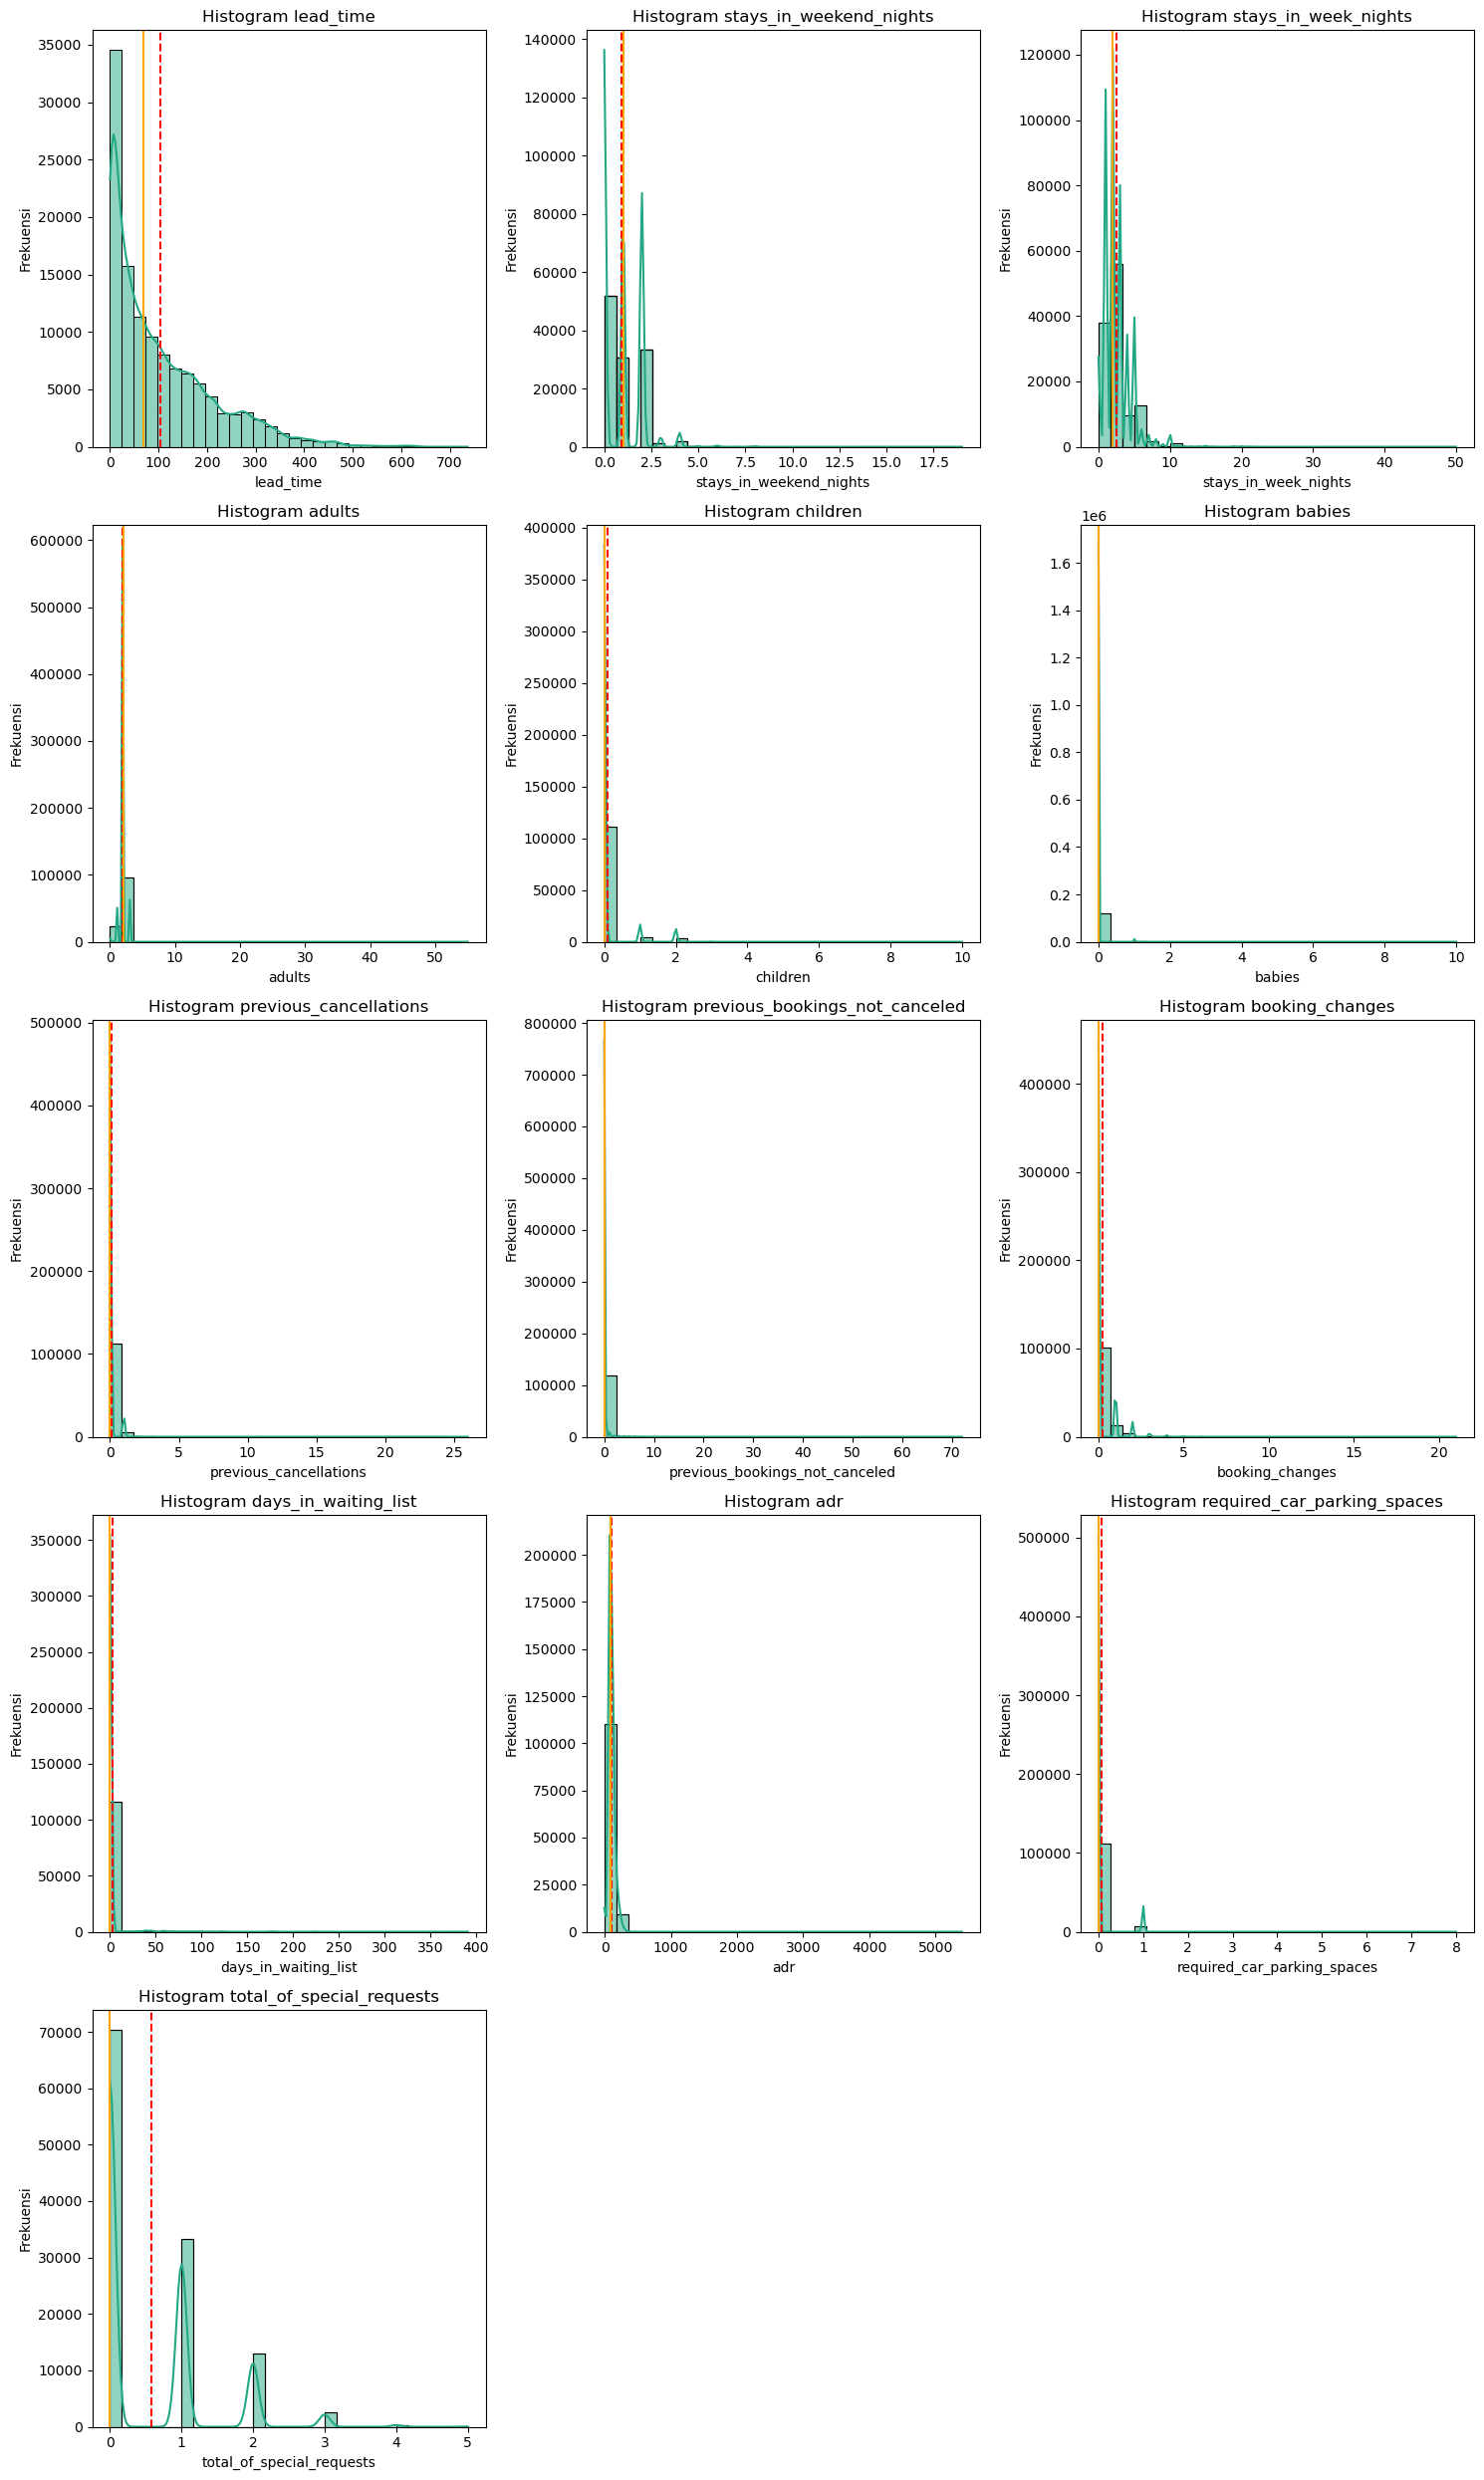

lead_time: P-Value = 0.00000 (tidak terdistribusi normal)
stays_in_weekend_nights: P-Value = 0.00000 (tidak terdistribusi normal)
stays_in_week_nights: P-Value = 0.00000 (tidak terdistribusi normal)
adults: P-Value = 0.00000 (tidak terdistribusi normal)
children: P-Value = 0.00000 (tidak terdistribusi normal)
babies: P-Value = 0.00000 (tidak terdistribusi normal)
previous_cancellations: P-Value = 0.00000 (tidak terdistribusi normal)
previous_bookings_not_canceled: P-Value = 0.00000 (tidak terdistribusi normal)
booking_changes: P-Value = 0.00000 (tidak terdistribusi normal)
days_in_waiting_list: P-Value = 0.00000 (tidak terdistribusi normal)
adr: P-Value = 0.00000 (tidak terdistribusi normal)
required_car_parking_spaces: P-Value = 0.00000 (tidak terdistribusi normal)
total_of_special_requests: P-Value = 0.00000 (tidak terdistribusi normal)


In [20]:
# Tentukan jumlah subplot berdasarkan jumlah kolom numerik
num_plots = len(num_check.columns)

# Menentukan jumlah baris dan kolom dalam grid secara dinamis
rows = math.ceil(num_plots / 3)
cols = min(3, num_plots)

# Ukuran keseluruhan subplot
plt.figure(figsize=(15, 5 * rows))

# Loop melalui setiap kolom numerik untuk melakukan visualisasi histogram dan uji normalitas
for i, column in enumerate(num_check.columns):
    
    # Menentukan subplot
    plt.subplot(rows, cols, i + 1)

    # Visualisasi Histogram menggunakan tema yang mirip "viridis"
    sns.histplot(num_check[column], kde=True, color=sns.color_palette("viridis", as_cmap=True)(0.6), bins=30)
    plt.axvline(num_check[column].mean(), color="red", linestyle="--")
    plt.axvline(num_check[column].median(), color="orange", linestyle="-")
    plt.title(f"Histogram {column}")
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    
    plt.tight_layout()

plt.show()

# Setelah histogram ditampilkan, lakukan uji normalitas dan cetak hasilnya
for column in num_check.columns:
    stats_val, p_val = normaltest(num_check[column].dropna())
    
    # Menentukan distribusi berdasarkan p-value menggunakan if-else
    if p_val >= 0.05:
        distribusi = 'terdistribusi normal'
    else:
        distribusi = 'tidak terdistribusi normal'
    
    # Menampilkan hasil uji normalitas
    print(f"{column}: P-Value = {p_val:.5f} ({distribusi})")


#### **Interpretasi Distribusi Data**

Berdasarkan visualisasi histogram dan uji normalitas di atas dapat diketahui bahwa kolom-kolom numerik yang ditampilkan memiliki data yang **tidak terdistribusi normal**. Hal ini dapat dilihat dari visualisasi *histogram* yang menunjukkan kecenderungan ***right-skewed*** atau ***positive skew*** atau tidak adanya visualisasi *histogram* yang menampikan bentuk kurva lonceng (*bell curve*), yang simetris di sekitar mean. Lebih lanjut, hal inu juga telah dikonfirmasi dengan uji normalitas menggunakan D’Agostino and Pearson, di mana nilai **p-value** berada di bawah 0,05 yang menunjukkan bahwa data tersebut menyimpang dari distribusi normal.


<hr>

## <center> **Pra-Model Building (Preprocessing & Feature Engineering)**

<hr>

> ### **Spliting dataset**

#### **Membagi Dataset**

Sebelum membangun model machine learning untuk memprediksi pembatalan pembookingan hotel, langkah pertama yang akan kita lakukan adalah membagi dataset awal `df_raw` menjadi dua bagian berdasarkan jenis hotel: ***City Hotel*** dan **R*esort Hotel***. Pembagian ini dilakukan karena ada kecenderungan karakteristik dan fungsi dari kedua jenis hotel ini berbeda, yang dapat mempengaruhi pola pembatalan. Hal ini terlihat dari tahap EDA sebelumnya dimana kedua jenis hotel ini memiliki nilai rata-rata pembatalan yang berbeda. Di samping itu, ada argumentasi yang didasarkan oleh *business knowledge* di antaranya:

1. ***City Hotel***:
   - **Target Pelanggan**: *City Hotel* biasanya lebih cocok untuk pebisnis, turis atau orang-orang yang ingin mengeksplorasi kota. 
   - **Fungsi dan Penggunaan**: City Hotel sering kali digunakan untuk kunjungan singkat seperti perjalanan bisnis, konferensi atau kegiatan wisata kota. Oleh karena itu, faktor-faktor seperti durasi menginap, waktu pemesanan dan harga mungkin memiliki pengaruh yang berbeda pada pola pembatalan dibandingkan dengan *Resort Hotel.*

2. ***Resort Hotel***:
   - **Target Pelanggan**: *Resort Hotel* lebih ditujukan untuk wisatawan yang ingin berlibur dan bersantai. 
   - **Fungsi dan Penggunaan**: *Resort Hotel* biasanya menawarkan pengalaman yang lebih menyeluruh dan sering kali menjadi tujuan utama dari liburan itu sendiri. Pengunjung cenderung memesan lebih awal dan untuk jangka waktu yang lebih lama dan kemungkinan ada lebih sedikit perubahan rencana yang drastis. Ini membuat pola pembatalan mungkin sangat berbeda dengan *City Hotel*.

Pembagian dataset berdasarkan jenis hotel ini adalah langkah krusial dalam praproses karena:

- **Perbedaan Karakteristik Pengunjung**: Pengunjung *City Hotel* mungkin memiliki kebutuhan dan kebiasaan yang berbeda dari pengunjung *Resort Hotel*. Misalnya, pebisnis yang memesan *City Hotel* mungkin lebih fleksibel dan lebih mungkin untuk membatalkan atau mengubah pemesanan dibandingkan dengan wisatawan yang memesan *Resort Hotel* jauh-jauh hari untuk liburan mereka.
  
- **Pengaruh Konteks pada Pembatalan**: Faktor-faktor seperti durasi menginap, lead time (waktu antara pemesanan dan check-in) dan jenis paket layanan yang dipilih dapat memiliki dampak yang berbeda pada keputusan untuk membatalkan, tergantung pada jenis hotel. Oleh karena itu, model machine learning yang efektif perlu mempertimbangkan perbedaan ini untuk memberikan prediksi yang akurat.

Dengan membagi dataset menjadi dua subset yang berbeda menjadi *City Hotel* dan *Resort Hotel*, kita dapat memastikan bahwa model yang dibangun untuk masing-masing jenis hotel lebih tepat dalam memahami konteks dan perilaku pembatalan yang spesifik. Langkah ini akan membantu meningkatkan akurasi dan keandalan model machine learning yang kita bangun.


### **Melakukan Split Train-Test Diawal**

Ketika kita melakukan *preprocess* sebelum memisahkan dataset menjadi *data train* dan *data test*, hal ini dapat berisiko menimbulkan masalah ***data leakage***.

***Data leakage*** adalah situasi di mana informasi dari luar *data train* digunakan untuk membuat model. Ini dapat memberikan kesan yang salah tentang kinerja model. Jika *data test* bocor ketika melatih model, hal ini dapat menyebabkan metrik evaluasi bernilai tinggi akibat adanya *data leakage* tersebut.

In [112]:
# Data untuk City Hotel
data_city = df_raw[df_raw['hotel'] == 'City Hotel']

# Data untuk Resort Hotel
data_resort = df_raw[df_raw['hotel'] == 'Resort Hotel']

# Memisahkan data train dan data test untuk City Hotel
X_city = data_city.drop(columns=['is_canceled'])
y_city = data_city['is_canceled']

data_train_city, data_test_city = train_test_split(data_city, stratify=y_city, test_size=0.25, random_state=2020)

# Memisahkan data train dan data test untuk City Hotel
X_resort = data_resort.drop(columns=['is_canceled'])
y_resort = data_resort['is_canceled']

data_train_resort, data_test_resort = train_test_split(data_resort, stratify=y_resort, test_size=0.25, random_state=2020)

# Display data train dan test untuk City Hotel dan Resort Hotel
display(data_train_city)
display(data_train_resort)
display(data_test_city)
display(data_test_resort)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
66101,City Hotel,1,57,2017,April,15,14,0,2,3,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,180.0,0,0,Canceled,2017-02-25
69521,City Hotel,1,174,2017,June,22,1,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,110.0,0,0,Canceled,2016-12-09
99725,City Hotel,0,377,2016,October,42,14,0,2,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient-Party,115.0,0,1,Check-Out,2016-10-16
60218,City Hotel,1,277,2016,November,46,7,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,100.0,0,0,Canceled,2016-04-04
53264,City Hotel,1,350,2016,June,25,17,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29.0,NaN,0,Transient,140.0,0,0,Canceled,2015-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67795,City Hotel,1,110,2017,May,19,7,2,2,1,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.0,0,0,Canceled,2017-01-19
59474,City Hotel,1,247,2016,October,44,28,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,37.0,NaN,0,Transient,110.0,0,0,Canceled,2016-03-15
43959,City Hotel,1,88,2015,September,39,26,2,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,170.0,0,0,Canceled,2015-09-09
41738,City Hotel,1,138,2015,August,34,22,2,1,2,0.0,0,HB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,17.0,NaN,0,Transient-Party,94.5,0,0,Canceled,2015-08-06


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
17110,Resort Hotel,0,47,2015,September,39,22,0,3,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,156.0,NaN,0,Contract,85.50,0,0,Check-Out,2015-09-25
13315,Resort Hotel,1,199,2017,August,32,8,1,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,168.00,0,1,Canceled,2017-02-04
32996,Resort Hotel,0,4,2017,February,6,11,0,1,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,68.00,0,1,Check-Out,2017-02-12
19068,Resort Hotel,0,11,2015,December,49,5,2,1,1,0.0,0,Undefined,ESP,Groups,TA/TO,0,0,0,A,A,1,No Deposit,350.0,NaN,0,Transient-Party,21.00,0,0,Check-Out,2015-12-08
39919,Resort Hotel,0,42,2017,August,34,23,2,7,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,314.0,NaN,0,Transient,205.18,0,0,Check-Out,2017-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26533,Resort Hotel,0,175,2016,July,31,25,3,6,2,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,71.0,NaN,0,Transient,128.00,0,0,Check-Out,2016-08-03
19904,Resort Hotel,0,5,2016,January,2,4,1,3,2,0.0,0,HB,PRT,Groups,Corporate,0,0,0,A,A,0,No Deposit,NaN,174.0,0,Transient-Party,68.00,0,0,Check-Out,2016-01-08
29123,Resort Hotel,0,3,2016,October,43,20,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,F,0,No Deposit,NaN,458.0,0,Transient,50.00,1,0,Check-Out,2016-10-21
3004,Resort Hotel,1,40,2015,November,46,11,0,4,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,1,No Deposit,185.0,281.0,0,Transient-Party,36.00,0,0,Canceled,2015-11-11


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
75174,City Hotel,1,292,2015,August,32,5,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,NaN,0,Transient-Party,62.0,0,0,Canceled,2015-07-02
89485,City Hotel,0,189,2016,May,21,19,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,65.0,0,0,Check-Out,2016-05-22
62518,City Hotel,1,38,2017,January,2,14,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,Non Refund,NaN,67.0,0,Transient,75.0,0,0,Canceled,2016-12-07
110971,City Hotel,0,67,2017,May,18,2,0,3,2,0.0,0,BB,SWE,Groups,Corporate,0,0,0,A,A,0,No Deposit,NaN,409.0,0,Transient-Party,120.0,0,0,Check-Out,2017-05-05
113688,City Hotel,0,175,2017,June,23,9,0,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,3.0,NaN,0,Transient-Party,130.0,0,0,Check-Out,2017-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,City Hotel,1,174,2016,July,31,25,1,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,28.0,NaN,0,Transient-Party,112.0,0,1,Canceled,2016-02-03
48889,City Hotel,1,57,2016,April,14,1,1,2,2,1.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,108.9,0,1,No-Show,2016-04-01
63645,City Hotel,1,30,2017,February,7,16,1,3,2,1.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,8.0,NaN,0,Transient,198.3,0,1,Canceled,2017-02-10
107369,City Hotel,0,35,2017,March,10,7,0,5,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,138.0,NaN,0,Transient,68.0,0,1,Check-Out,2017-03-12


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
19201,Resort Hotel,1,92,2016,February,9,26,1,2,2,0.0,0,Undefined,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,134.0,NaN,0,Transient,79.00,0,0,Canceled,2015-12-10
26909,Resort Hotel,0,2,2016,August,33,12,1,2,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,239.67,0,1,Check-Out,2016-08-15
9101,Resort Hotel,1,96,2016,October,44,27,2,5,1,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient-Party,66.02,0,0,Canceled,2016-07-25
3579,Resort Hotel,0,127,2015,December,52,24,2,5,2,0.0,0,BB,POL,Online TA,TA/TO,0,0,0,A,D,1,No Deposit,240.0,NaN,0,Transient-Party,37.29,0,1,Check-Out,2015-12-31
33427,Resort Hotel,0,23,2017,February,8,21,0,2,1,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Transient,43.00,0,2,Check-Out,2017-02-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20886,Resort Hotel,0,26,2016,February,6,6,2,5,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,8.0,NaN,0,Transient,34.73,0,0,Check-Out,2016-02-13
13011,Resort Hotel,1,167,2017,July,30,27,2,6,2,2.0,0,HB,PRT,Direct,Direct,0,0,0,C,C,1,No Deposit,NaN,NaN,0,Transient,182.25,0,0,Canceled,2017-02-17
20593,Resort Hotel,0,24,2016,January,5,28,2,5,1,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,171.0,NaN,0,Transient,25.00,0,0,Check-Out,2016-02-04
7951,Resort Hotel,1,19,2016,September,37,4,2,4,2,1.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,NaN,0,Transient,175.50,0,1,No-Show,2016-09-04


> ## **Dataset *City Hotel***

> ### **Data Cleaning**

Proses *data cleaning* dilakukan kembali karena dataset awal `df_raw` telah dibagi menjadi dua subset berdasarkan jenis hotel, yaitu `City Hotel` dan `Resort Hotel`. Akibatnya, untuk proses pembuatan model ini perlu dilakukan *data clenaing* ulang guna menghasilkan model yang efektif.

#### **Handling Duplicates**

Pada bagian EDA kita telah mengetahui bahwa dataset ini memiliki data *duplicate* sehingga setelah dibagi menjadi dua *sub-set* data ini, *duplicate* tersebut perlu didrop agar tidak menyebabakan kinerja *machine learning* menjadi bias.

In [116]:
# menghitung jumlah data yang duplikat pada dataset City Hotel
count_duplikat_city = data_train_city.duplicated().sum()

# mendrop data duplikat dataset City Hotel
data_train_city1 = data_train_city.drop_duplicates()


print(f'Jumlah total entries pada sub-set data train city hotel adalah {data_train_city.shape[0]}')
print(f'Jumlah entries duplicate pada sub-set data train city hotel adalah {count_duplikat_city}')
print(f'Jumlah total entries pada sub-set data train city hotel setelah drop duplicate adalah {data_train_city1.shape[0]}')


Jumlah total entries pada sub-set data train city hotel adalah 59497
Jumlah entries duplicate pada sub-set data train city hotel adalah 18249
Jumlah total entries pada sub-set data train city hotel setelah drop duplicate adalah 41248


#### **Handling Missing Value**

Pada bagian EDA kita telah mengetahui bahwa dataset ini memiliki data *missing value* sehingga setelah diperlukan pertimbangan untuk mengisinya dengan *mean / median / modus* atau mendrop *missing value* tersebut.

In [118]:
# menampilkan persentase missing value pada dataset City Hotel
missing_percentage_city = (data_train_city1.isna().sum() / len(data_train_city1) * 100)
missing_percentage_city = missing_percentage_city.sort_values(ascending=False).round(2).astype(str) + ' %'
missing_percentage_city

company                           94.94 %
agent                             10.3 % 
country                           0.01 % 
children                          0.01 % 
reserved_room_type                0.0 %  
assigned_room_type                0.0 %  
booking_changes                   0.0 %  
deposit_type                      0.0 %  
hotel                             0.0 %  
previous_cancellations            0.0 %  
days_in_waiting_list              0.0 %  
customer_type                     0.0 %  
adr                               0.0 %  
required_car_parking_spaces       0.0 %  
total_of_special_requests         0.0 %  
reservation_status                0.0 %  
previous_bookings_not_canceled    0.0 %  
is_repeated_guest                 0.0 %  
is_canceled                       0.0 %  
distribution_channel              0.0 %  
market_segment                    0.0 %  
meal                              0.0 %  
babies                            0.0 %  
adults                            

#### **Penanganan Missing Value pada Data Train untuk City Hotel**

Pada data train untuk **City Hotel**, terdapat missing value pada beberapa kolom penting, yaitu: `company`, `agent`, `country`, dan `children`. Penanganan missing value ini dilakukan dengan strategi yang berbeda tergantung pada konteks dan makna fitur tersebut.

1. **Kolom `company` dan `agent`**:
   - Kolom `company` dan `agent` menunjukkan apakah pelanggan memesan kamar melalui perusahaan atau agen tertentu.
   - Untuk menangani missing value pada kolom ini, kita akan menambahkan kolom baru yang akan berfungsi sebagai penanda.
     - Kolom tambahan ini akan memiliki nilai **1** jika pelanggan memesan melalui `company` atau `agent`.
     - Sebaliknya, jika kolom tersebut memiliki missing value, maka kolom tambahan akan diisi dengan **0**, yang menunjukkan bahwa pelanggan tidak memesan melalui perusahaan atau agen.
   - Dengan pendekatan ini, kita dapat memanfaatkan informasi dari missing value sebagai fitur tambahan dalam model.

2. **Kolom `country` dan `children`**:
   - Untuk kolom `country` *missing value* akan diisi dengan nilai `'Undefined'` sedangkan ntuk kolom `children` *missing value* akan diisi dengan nilai `0`. Ini digunakan untuk menangani ketidakpastian atau kurangnya informasi dari data asli.
   - Upaya ini dilakukan untuk membantu memastikan bahwa semua data dapat diproses oleh model tanpa mempengaruhi hasil prediksi secara signifikan, serta menjaga agar informasi tidak hilang begitu saja.

#### **Handling Outliers**

Pada bagian EDA, kita telah mengetahui bahwa dataset ini memiliki outliers pada beberapa fitur. Kita akan mengecek kembali dan mempertimbangkan *treatment* apa yang akan diberikan.

In [121]:
# menampilkan proporsi outlier secara detail pada feature numerikal
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

numerical_city = data_train_city1[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                'adr', 'required_car_parking_spaces', 'total_of_special_requests']]

for feature in numerical_city.columns: 
    IQR = numerical_city[feature].quantile(0.75) - numerical_city[feature].quantile(0.25)
    lower_fence = numerical_city[feature].quantile(0.25) - 1.5 * IQR
    upper_fence = numerical_city[feature].quantile(0.75) + 1.5 * IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(numerical_city[numerical_city[feature] < lower_fence]))
    number_inside.append(len(numerical_city[(numerical_city[feature] >= lower_fence) & (numerical_city[feature] <= upper_fence)]))
    number_upper.append(len(numerical_city[numerical_city[feature] > upper_fence]))
    percentage_outlier.append(round((len(numerical_city[numerical_city[feature] < lower_fence]) + len(numerical_city[numerical_city[feature] > upper_fence])) / len(numerical_city) * 100, 2))

# membuat DataFrame untuk menamilkan hasil"
outliers = pd.DataFrame({
    "Attribute (Numerical Features)": numerical_city.columns, 
    "Lower Fence": list_lower,
    "Upper Fence": list_upper,
    "# Lower": number_lower,
    "# Inside": number_inside,
    "# Upper": number_upper,
    "% Outlier": percentage_outlier
})

outliers


,Attribute (Numerical Features),Lower Fence,Upper Fence,# Lower,# Inside,# Upper,% Outlier
0,lead_time,-145.00,279.00,0,39959,1289,3.12
1,stays_in_weekend_nights,-3.00,5.00,0,41187,61,0.15
2,stays_in_week_nights,-2.00,6.00,0,40737,511,1.24
3,adults,2.00,2.00,8358,29425,3465,28.66
4,children,0.00,0.00,0,37485,3759,9.11
5,babies,0.00,0.00,0,40967,281,0.68
6,previous_cancellations,0.00,0.00,0,40306,942,2.28
7,previous_bookings_not_canceled,0.00,0.00,0,40095,1153,2.80
8,booking_changes,0.00,0.00,0,34502,6746,16.35
9,days_in_waiting_list,0.00,0.00,0,40634,614,1.49


##### **Proporsi Outlier pada Sejumlah Fitur Numerikal di atas:**

- **lead_time**: Memiliki sekitar 3.12% outlier yang terutama berada di atas upper fence. Ini menunjukkan bahwa ada beberapa pemesanan yang dilakukan jauh sebelumnya, lebih dari nilai yang diharapkan.
- **stays_in_weekend_nights** dan **stays_in_week_nights**: Kedua fitur ini memiliki persentase outlier yang relatif rendah (0.15% dan 1.24%), yang menunjukkan bahwa durasi menginap pada akhir pekan dan hari kerja cukup konsisten dan jarang memiliki nilai ekstrim.
- **adults**: Ini adalah fitur dengan jumlah outlier tertinggi (28.66%), menunjukkan bahwa ada banyak pemesanan yang dilakukan untuk jumlah orang dewasa yang jauh lebih besar dari biasanya, yang bisa jadi untuk acara kelompok atau konferensi.
- **children** dan **babies**: Kedua fitur ini juga memiliki persentase outlier yang cukup signifikan, yang mengindikasikan adanya pemesanan yang tidak biasa dengan jumlah anak-anak atau bayi yang lebih banyak dari biasanya.
- **adr (Average Daily Rate)**: Fitur ini menunjukkan 4.85% outlier, yang menunjukkan variasi besar dalam tarif harian yang mungkin dipengaruhi oleh musim, ketersediaan, atau faktor lainnya.
- **required_car_parking_spaces** dan **total_of_special_requests**: Fitur ini juga memiliki sejumlah outlier, meskipun tidak setinggi fitur lain. Ini bisa mencerminkan kebutuhan khusus atau preferensi dari segmen tertentu dari pelanggan.

##### **Decision on Handling Outliers:**

Outlier tidak dihapus karena menghapus outlier berisiko menghilangkan informasi penting yang mungkin merepresentasikan variasi data yang valid. Outlier dalam kolom-kolom dataset ini mungkin mencerminkan keadaan khusus atau kasus unik yang penting untuk dianalisis. Misalnya, outlier dapat menunjukkan segmen pelanggan yang berbeda atau situasi luar biasa yang harus diperhatikan dalam model. Namun, kita akan tetap menangani data yang tampak anomali dengan hati-hati menggunakan *domain knowledge* untuk memastikan bahwa outlier yang benar-benar tidak relevan atau mengganggu dapat diidentifikasi dan dikelola dengan tepat.

#### **Handling Data Entry Errors**

Bagian ini menunjukan lanjutan proses dari *handling outlier* dimana *handling data entry error* ini sama seperti bagian *identifying and handling data entry error* di EDA. Hal ini dilakukan kembali karena datasetnya telah displit ke dalam dua sub-set sehinggap perlu untuk mengecek kembali apakah terdapat nilai pada suatu kolom yang tidak masuk akal.

**Mengecek kesesuaian kolom `is_canceled` dan `reservation_status`**

In [126]:
# Menampilkan kolom is_canceled yang bernilai 1 dan reservation_status bernilai Canceled
data_train_city1[(data_train_city1["is_canceled"] == 0) & (data_train_city1["reservation_status"] == 'Canceled')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [127]:
# Menampilkan kolom is_canceled yang bernilai 0 dan reservation_status bernilai No-Show
data_train_city1[(data_train_city1["is_canceled"] == 0) & (data_train_city1["reservation_status"] == 'No-Show')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [128]:
# Menampilkan kolom is_canceled yang bernilai 1 dan reservation_status bernilai Check-Out
data_train_city1[(data_train_city1["is_canceled"] == 1) & (data_train_city1["reservation_status"] == 'Check-Out')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


**Menghapus pemesanan dengan nilai 0 pada kolom `adults`, `children`, dan `babies`**

In [130]:
# Menampilkan kolom adults, children, babies yang bernilai 0
data_train_city1[(data_train_city1["adults"] == 0) & (data_train_city1["children"] == 0) & (data_train_city1["babies"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
93397,City Hotel,0,1,2016,July,30,20,0,1,0,0.0,0,SC,PRT,Direct,Direct,0,0,0,E,B,1,No Deposit,14.0,NaN,0,Transient,0.00,0,0,Check-Out,2016-07-21
85491,City Hotel,0,0,2016,March,12,16,0,0,0,0.0,0,SC,DEU,Online TA,TA/TO,1,0,0,D,K,0,No Deposit,NaN,NaN,0,Transient,0.00,0,1,Check-Out,2016-03-16
98046,City Hotel,0,42,2016,August,35,27,8,20,0,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,K,2,No Deposit,7.0,NaN,0,Transient,0.00,0,1,Check-Out,2016-09-24
103714,City Hotel,0,255,2016,December,53,27,0,3,0,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,3,No Deposit,79.0,NaN,0,Transient,20.88,0,0,Check-Out,2016-12-30
102054,City Hotel,0,0,2016,November,48,23,0,0,0,0.0,0,BB,PRT,Online TA,TA/TO,1,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,0.00,0,1,Check-Out,2016-11-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111710,City Hotel,0,6,2017,May,20,14,0,0,0,0.0,0,BB,PRT,Groups,Corporate,0,0,0,A,A,1,No Deposit,NaN,169.0,0,Transient-Party,0.00,0,0,Check-Out,2017-05-14
76620,City Hotel,0,110,2015,July,30,25,2,2,0,0.0,0,HB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,2,No Deposit,17.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-07-29
88327,City Hotel,0,5,2016,April,18,27,2,5,0,0.0,0,SC,ESP,Direct,Direct,0,0,0,A,K,4,No Deposit,NaN,NaN,0,Transient-Party,0.00,0,0,Check-Out,2016-05-04
100273,City Hotel,0,10,2016,October,42,14,4,7,0,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,39.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2016-10-25


Pada dataset terdapat entri di mana jumlah tamu tercatat sebagai 0. Hal ini tidak mungkin secara logis, karena jika ada pemesanan kamar hotel, seharusnya ada minimal 1 tamu yang menginap. Oleh karena itu, data yang akan digunakan untuk analisis dan pemodelan adalah data di mana total jumlah tamu lebih dari 0. Dengan demikian, kita memastikan bahwa data yang digunakan merepresentasikan skenario yang valid dan masuk akal dalam konteks pemesanan hotel.

In [132]:
data_train_city1.drop(data_train_city1[(data_train_city1["adults"] == 0) & 
             (data_train_city1["children"] == 0) & 
             (data_train_city1["babies"] == 0)].index, inplace=True)

**Menghapus jumlah hari menginap bernilai 0 pada kolom `stays_in_weekend_nights` dan `stays_in_week_nights`**

In [134]:
# Menampilkan kolom stays_in_weekend_nights bernilai 0 tapi kolom stays_in_week_nights bernilai 0
data_train_city1[(data_train_city1["stays_in_weekend_nights"] == 0) & (data_train_city1["stays_in_week_nights"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
89439,City Hotel,0,67,2016,May,21,21,0,0,2,0.0,0,BB,ISL,Online TA,TA/TO,0,0,0,D,E,1,No Deposit,9.0,NaN,0,Transient,0.0,0,1,Check-Out,2016-05-21
100286,City Hotel,0,0,2016,October,44,26,0,0,1,0.0,0,SC,PRT,Online TA,TA/TO,1,0,0,A,K,0,No Deposit,7.0,NaN,0,Transient,0.0,0,1,Check-Out,2016-10-26
89106,City Hotel,0,0,2016,May,21,17,0,0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,2016-05-17
82258,City Hotel,0,0,2015,December,52,24,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-12-24
101133,City Hotel,0,42,2016,November,46,7,0,0,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,10.0,NaN,0,Transient,0.0,0,0,Check-Out,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106826,City Hotel,0,1,2017,March,9,3,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-03-03
106628,City Hotel,0,0,2017,February,9,28,0,0,1,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,D,1,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-02-28
106406,City Hotel,0,0,2017,February,8,25,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,1,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-02-25
89263,City Hotel,0,0,2016,May,21,19,0,0,1,0.0,0,BB,MAR,Direct,Direct,1,0,0,A,K,0,No Deposit,NaN,NaN,0,Transient-Party,0.0,0,0,Check-Out,2016-05-19


In [135]:
# Menampilkan kolom stays_in_weekend_nights > 5 tapi kolom stays_in_week_nights bernilai 0
data_train_city1[(data_train_city1["stays_in_weekend_nights"] > 5) & (data_train_city1["stays_in_week_nights"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


Pada dataset terdapat entri di mana jumlah hari menginap tercatat sebagai 0. Hal ini secara logis tidak mungkin terjadi, karena jika seorang pelanggan menginap di sebuah hotel, seharusnya jumlah hari menginapnya lebih dari 0. Oleh karena itu, data yang mencatat jumlah hari menginap sebesar 0 akan dihapus dari dataset. Langkah ini diambil untuk memastikan bahwa analisis dan model yang dibangun hanya berdasarkan data yang valid dan representatif dari skenario nyata pemesanan hotel.

In [137]:
data_train_city1.drop(data_train_city1[(data_train_city1["stays_in_weekend_nights"] == 0) & 
        (data_train_city1["stays_in_week_nights"] == 0)].index, inplace=True)

**Menghapus nilai `adr` yang tidak masuk akal**

In [139]:
data_train_city1[data_train_city1['adr'] == data_train_city1['adr'].min()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40395,City Hotel,0,0,2015,July,30,24,0,2,2,1.0,0,BB,PRT,Direct,Direct,0,0,0,D,F,0,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-26
79006,City Hotel,1,4,2015,December,49,5,0,1,2,0.0,0,BB,PRT,Complementary,Direct,1,2,0,A,A,0,No Deposit,NaN,45.0,0,Transient,0.0,0,2,Canceled,2015-12-04
77157,City Hotel,0,1,2016,March,10,1,0,2,1,0.0,0,BB,PRT,Complementary,Direct,1,3,13,E,F,0,No Deposit,NaN,45.0,0,Transient,0.0,0,1,Check-Out,2016-03-03
41764,City Hotel,0,4,2015,August,35,23,2,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,A,1,No Deposit,NaN,45.0,0,Transient,0.0,0,1,Check-Out,2015-08-26
74720,City Hotel,0,1,2016,May,21,17,0,1,1,0.0,0,BB,PRT,Complementary,Corporate,1,0,24,D,A,0,No Deposit,NaN,45.0,0,Transient,0.0,0,2,Check-Out,2016-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94392,City Hotel,0,15,2017,June,22,2,0,1,2,0.0,0,BB,PRT,Complementary,Direct,1,4,13,F,F,0,No Deposit,NaN,45.0,0,Transient,0.0,0,3,Check-Out,2017-06-03
63711,City Hotel,1,1,2017,February,7,18,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,No-Show,2017-02-18
74699,City Hotel,0,0,2015,September,37,8,0,1,1,0.0,0,BB,PRT,Complementary,Direct,1,0,3,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-09-09
77141,City Hotel,0,0,2015,September,37,8,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-09-09


Nilai 0 mungkin terjadi dalam kasus di mana hotel tidak mendapatkan keuntungan dari penjualan kamar. Hal ini dapat terjadi karena kemungkinan seperti, kamar merupakan bagian dari bonus paket.

In [141]:
data_train_city1[data_train_city1['adr'] == data_train_city1['adr'].max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [142]:
pd.DataFrame(data_train_city1['adr'].unique(), columns=['adr']).sort_values(by='adr', ascending=False)

,adr
4480,5400.00
3175,510.00
4722,451.50
3210,375.50
4347,372.33
...,...
1444,3.00
423,2.00
4636,1.48
1106,1.00


Pada dataset City Hotel, terdapat entri di mana nilai maksimal `adr` (Average Daily Rate) mencapai 5.400 Euro. Ini merupakan harga yang sangat tinggi jika dibandingkan dengan data lainnya dalam dataset. Nilai yang ekstrem seperti ini kemungkinan besar merupakan outlier yang tidak merepresentasikan kondisi umum dari data dan dapat mengganggu analisis atau model prediksi. Oleh karena itu, data dengan nilai `adr` sebesar 5.400 Euro akan dihapus dari dataset. Langkah ini diambil untuk memastikan bahwa analisis dan model yang dibangun didasarkan pada data yang lebih representatif dan bebas dari pengaruh outlier ekstrem yang tidak realistis.

In [144]:
data_train_city2 = data_train_city1.loc[data_train_city1['adr'] < 5400]
data_train_city2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
66101,City Hotel,1,57,2017,April,15,14,0,2,3,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,180.00,0,0,Canceled,2017-02-25
69521,City Hotel,1,174,2017,June,22,1,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,110.00,0,0,Canceled,2016-12-09
99725,City Hotel,0,377,2016,October,42,14,0,2,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient-Party,115.00,0,1,Check-Out,2016-10-16
60218,City Hotel,1,277,2016,November,46,7,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,100.00,0,0,Canceled,2016-04-04
53264,City Hotel,1,350,2016,June,25,17,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29.0,NaN,0,Transient,140.00,0,0,Canceled,2015-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42929,City Hotel,1,87,2015,September,37,11,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,68.0,0,Transient-Party,100.00,0,0,Canceled,2015-09-08
72745,City Hotel,1,164,2017,August,31,4,2,7,2,0.0,1,SC,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,22.0,NaN,0,Transient,67.15,0,2,Canceled,2017-04-01
55496,City Hotel,1,220,2016,August,34,14,2,2,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,108.45,0,0,Canceled,2016-02-05
67795,City Hotel,1,110,2017,May,19,7,2,2,1,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,0,Canceled,2017-01-19


**Menghapus pemesanan `required_car_parking_spaces` yang tidak sesuai**

In [146]:
data_train_city2['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    39498
1    1451 
3    2    
2    1    
Name: count, dtype: int64

In [147]:
data_train_city2[data_train_city2['required_car_parking_spaces']==3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
110812,City Hotel,0,30,2017,April,17,29,2,1,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,153.33,3,2,Check-Out,2017-05-02
102762,City Hotel,0,13,2016,December,50,5,1,0,1,0.0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,96.00,3,0,Check-Out,2016-12-06


Pada dataset terdapat data dimana jumlah pengunjung (adult) tidak senilai dengan permintaan parkir mobil yang dibutuhkan. Oleh karena itu data diputuskan untuk dihapus.

In [149]:
data_train_city3 = data_train_city2.loc[data_train_city2['required_car_parking_spaces'] < 3]
data_train_city3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
66101,City Hotel,1,57,2017,April,15,14,0,2,3,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,180.00,0,0,Canceled,2017-02-25
69521,City Hotel,1,174,2017,June,22,1,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,110.00,0,0,Canceled,2016-12-09
99725,City Hotel,0,377,2016,October,42,14,0,2,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient-Party,115.00,0,1,Check-Out,2016-10-16
60218,City Hotel,1,277,2016,November,46,7,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,100.00,0,0,Canceled,2016-04-04
53264,City Hotel,1,350,2016,June,25,17,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29.0,NaN,0,Transient,140.00,0,0,Canceled,2015-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42929,City Hotel,1,87,2015,September,37,11,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,68.0,0,Transient-Party,100.00,0,0,Canceled,2015-09-08
72745,City Hotel,1,164,2017,August,31,4,2,7,2,0.0,1,SC,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,22.0,NaN,0,Transient,67.15,0,2,Canceled,2017-04-01
55496,City Hotel,1,220,2016,August,34,14,2,2,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,108.45,0,0,Canceled,2016-02-05
67795,City Hotel,1,110,2017,May,19,7,2,2,1,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,0,Canceled,2017-01-19


**Menghapus jumlah `babies` yang tidak sesuai**

In [151]:
data_train_city3['babies'].value_counts()

babies
0     40672
1     271  
2     5    
9     1    
10    1    
Name: count, dtype: int64

In [152]:
data_train_city3[data_train_city3['babies']>2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,NaN,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,84.45,0,1,Check-Out,2016-01-14


Pada dataset city terdapat data dimana jumlah bayi yang terlalu banyak dalam pemesanan kamar. Oleh karena itu jumlah bayi yang lebih besar dari 2 akan dianggap sebagai data anomali maka akan didrop.

In [154]:
data_train_city4 = data_train_city3.loc[data_train_city3['babies'] < 3]
data_train_city4

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
66101,City Hotel,1,57,2017,April,15,14,0,2,3,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,180.00,0,0,Canceled,2017-02-25
69521,City Hotel,1,174,2017,June,22,1,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,110.00,0,0,Canceled,2016-12-09
99725,City Hotel,0,377,2016,October,42,14,0,2,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient-Party,115.00,0,1,Check-Out,2016-10-16
60218,City Hotel,1,277,2016,November,46,7,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,100.00,0,0,Canceled,2016-04-04
53264,City Hotel,1,350,2016,June,25,17,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29.0,NaN,0,Transient,140.00,0,0,Canceled,2015-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42929,City Hotel,1,87,2015,September,37,11,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,68.0,0,Transient-Party,100.00,0,0,Canceled,2015-09-08
72745,City Hotel,1,164,2017,August,31,4,2,7,2,0.0,1,SC,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,22.0,NaN,0,Transient,67.15,0,2,Canceled,2017-04-01
55496,City Hotel,1,220,2016,August,34,14,2,2,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,108.45,0,0,Canceled,2016-02-05
67795,City Hotel,1,110,2017,May,19,7,2,2,1,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,0,Canceled,2017-01-19


**Menyesuaikan unique value `meal`**

In [156]:
data_train_city4['meal'].value_counts()

meal
BB    31680
SC    7071 
HB    2187 
FB    10   
Name: count, dtype: int64

> ### **Feature Engineering**

In [158]:
# menampilkan nama kolom dan jumlah baris serta kolom
display(data_train_city4.columns, data_train_city4.shape)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

(40948, 32)

#### **Skema Feature Engineering**

Untuk memastikan bahwa data siap digunakan dalam pemodelan, kita akan menerapkan skema pemrosesan data sebagai berikut:

1. **Encoding**: 
   - Fitur-fitur kategorikal akan diubah menjadi format numerik yang dapat digunakan oleh algoritma machine learning. Teknik encoding yang digunakan melibatkan pengurutan kategori berdasarkan hubungan statistiknya dengan target variabel. Hal ini dilakukan dengan menggunakan teknik `np.where()` untuk memastikan bahwa urutan kategori sesuai dengan rata-rata target (mean). Teknik ini mirip dengan *Ordinal Encoding*, tetapi dengan penyesuaian tambahan untuk memastikan bahwa urutan kategori benar-benar mencerminkan hubungan yang tepat dengan target.
   - Fitur-fitur yang akan di-encode adalah:
     - `market_segment`
     - `deposit_type`
     - `customer_type`
     - `reserved_room_type`
     - `assigned_room_type`
     - `meal`
     - `distribution_channel`

2. **Scaling**: 
   - Fitur-fitur numerik akan diubah ke dalam skala tertentu guna memastikan bahwa semua fitur berada dalam rentang yang sama atau untuk mengurangi pengaruh outlier. Teknik scaling yang digunakan adalah **RobustScaler**. RobustScaler adalah teknik normalisasi yang lebih tahan terhadap outlier dibandingkan dengan standardisasi biasa, karena menggunakan nilai median dan interquartile range (IQR) dalam proses scaling. Fitur-fitur yang akan di-scaling adalah:
     - `required_car_parking_spaces`
     - `total_of_special_requests`
     - `days_in_waiting_list`
     - `booking_changes`
     - `adr`

Dengan menerapkan skema pemrosesan ini, kita dapat memastikan bahwa data yang digunakan dalam model berada dalam format yang optimal. Ini memungkinkan model untuk menangkap hubungan penting antar variabel dan meminimalkan dampak outlier yang bisa mengganggu kinerja model. Hasil akhirnya adalah model yang lebih akurat dan andal dalam memprediksi pembatalan pemesanan.


### **1. Encoding**

**Fitur `market_segment`**

In [162]:
data_train_city4['market_segment'].value_counts()

market_segment
Online TA        26628
Offline TA/TO    5712 
Direct           4195 
Groups           2227 
Corporate        1658 
Complementary    361  
Aviation         165  
Undefined        2    
Name: count, dtype: int64

In [163]:
data_train_city4.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)

market_segment
Undefined        1.000000
Online TA        0.362663
Groups           0.358779
Aviation         0.224242
Offline TA/TO    0.183824
Direct           0.171156
Corporate        0.115199
Complementary    0.102493
Name: is_canceled, dtype: float64

**Fitur `deposit_type`**

In [165]:
data_train_city4['deposit_type'].value_counts()

deposit_type
No Deposit    40155
Non Refund    780  
Refundable    13   
Name: count, dtype: int64

In [166]:
data_train_city4.groupby('deposit_type')['is_canceled'].mean().sort_values(ascending=False)

deposit_type
Non Refund    0.978205
Refundable    0.692308
No Deposit    0.291844
Name: is_canceled, dtype: float64

**Fitur `customer_type`**

In [168]:
data_train_city4['customer_type'].value_counts()

customer_type
Transient          33908
Transient-Party    5720 
Contract           1113 
Group              207  
Name: count, dtype: int64

In [169]:
data_train_city4.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False)

customer_type
Transient          0.329922
Contract           0.250674
Transient-Party    0.176399
Group              0.077295
Name: is_canceled, dtype: float64

**Fitur `reserved_room_type`**

In [171]:
data_train_city4['reserved_room_type'].value_counts()

reserved_room_type
A    29234
D    8140 
F    1354 
E    1104 
B    743  
G    363  
C    10   
Name: count, dtype: int64

In [172]:
data_train_city4.groupby('reserved_room_type')['is_canceled'].mean().sort_values(ascending=False)

reserved_room_type
C    0.400000
F    0.387001
D    0.341400
B    0.333782
E    0.326087
A    0.290552
G    0.225895
Name: is_canceled, dtype: float64

**Fitur `assigned_room_type`**

In [174]:
data_train_city4['assigned_room_type'].value_counts()

assigned_room_type
A    25806
D    10099
E    1545 
F    1508 
B    1259 
G    529  
C    117  
K    85   
Name: count, dtype: int64

In [175]:
data_train_city4.groupby('assigned_room_type')['is_canceled'].mean().sort_values(ascending=False)

assigned_room_type
F    0.354775
A    0.321902
D    0.282701
E    0.247249
B    0.243050
G    0.166352
C    0.094017
K    0.082353
Name: is_canceled, dtype: float64

**Fitur `meal`**

In [177]:
data_train_city4['meal'].value_counts()

meal
BB    31680
SC    7071 
HB    2187 
FB    10   
Name: count, dtype: int64

In [178]:
data_train_city4.groupby('meal')['is_canceled'].mean().sort_values(ascending=False)

meal
SC    0.362749
HB    0.302241
BB    0.292393
FB    0.200000
Name: is_canceled, dtype: float64

**Fitur `distribution_channel`**

In [180]:
data_train_city4['distribution_channel'].value_counts()

distribution_channel
TA/TO        34305
Direct       4582 
Corporate    1927 
GDS          130  
Undefined    4    
Name: count, dtype: int64

In [181]:
data_train_city4.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)

distribution_channel
Undefined    1.000000
TA/TO        0.334266
Direct       0.166521
GDS          0.161538
Corporate    0.122470
Name: is_canceled, dtype: float64

Setelah mengecek rata-rata (mean) dari setiap *unique value* pada fitur-fitur di atas, langkah selanjutnya adalah memasukkan semua proses praproses (preprocessing) ke dalam pipeline. Ini dilakukan agar data uji (data test) mendapatkan perlakuan yang sama dengan data latih (data train). Semua langkah penanganan, mulai dari penanganan missing value, mean encoding, hingga scaling dengan RobustScaler, akan dimasukkan ke dalam pipeline preprocessing. Dengan demikian, baik data latih maupun data uji akan diproses dengan cara yang konsisten, memastikan bahwa tidak ada data yang diperlakukan berbeda dan menghindari potensi *data leakage* atau bias dalam model.

> ### **Pipeline Preprocess Dataset City Hotel**

In [184]:
# Custom Transformer untuk melakukan tugas spesifik
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()

        # Menangani missing values
        X['company_booked'] = (~X['company'].isna()).astype(int)
        X['agent_booked'] = (~X['agent'].isna()).astype(int)
        X['children'] = X['children'].fillna(0).astype(int)
        X['country'] = X['country'].fillna('Undefined')

        # Transformasi kolom berdasarkan ketentuan
        X['market_segment'] = np.where(X['market_segment'] == 'Undefined', 1,
                                        np.where(X['market_segment'] == 'Online TA', 2,
                                        np.where(X['market_segment'] == 'Groups', 3,
                                        np.where(X['market_segment'] == 'Aviation', 4,
                                        np.where(X['market_segment'] == 'Offline TA/TO', 5,
                                        np.where(X['market_segment'] == 'Direct', 6,
                                        np.where(X['market_segment'] == 'Corporate', 7, 8)))))))
        
        X['deposit_type'] = np.where(X['deposit_type'] == 'Non Refund', 1,
                                     np.where(X['deposit_type'] == 'Refundable', 2, 3))
        
        X['customer_type'] = np.where(X['customer_type'] == 'Transient', 1,
                                      np.where(X['customer_type'] == 'Contract', 2,
                                      np.where(X['customer_type'] == 'Transient-Party', 3, 4)))
        
        X['reserved_room_type'] = np.where(X['reserved_room_type'] == 'C', 1,
                                           np.where(X['reserved_room_type'] == 'F', 2,
                                           np.where(X['reserved_room_type'] == 'D', 3,
                                           np.where(X['reserved_room_type'] == 'B', 4,
                                           np.where(X['reserved_room_type'] == 'E', 5,
                                           np.where(X['reserved_room_type'] == 'A', 6, 7))))))

        X['assigned_room_type'] = np.where(X['assigned_room_type'] == 'F', 1,
                                           np.where(X['assigned_room_type'] == 'A', 2,
                                           np.where(X['assigned_room_type'] == 'D', 3,
                                           np.where(X['assigned_room_type'] == 'E', 4,
                                           np.where(X['assigned_room_type'] == 'B', 5,
                                           np.where(X['assigned_room_type'] == 'G', 6,
                                           np.where(X['assigned_room_type'] == 'C', 7, 8)))))))

        X['meal'] = np.where(X['meal'] == 'SC', 1,
                             np.where(X['meal'] == 'HB', 2,
                             np.where(X['meal'] == 'BB', 3, 4)))

        X['distribution_channel'] = np.where(X['distribution_channel'] == 'Undefined', 1,
                                              np.where(X['distribution_channel'] == 'TA/TO', 2,
                                              np.where(X['distribution_channel'] == 'Direct', 3,
                                              np.where(X['distribution_channel'] == 'GDS', 4, 5))))
        
        return X

# Feature lists
numerical_features = ['required_car_parking_spaces', 'total_of_special_requests','days_in_waiting_list','booking_changes','adr']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Preprocessing for categorical data
# Note: Categorical data is now handled in CustomTransformer

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ], remainder='passthrough')

# Final pipeline
full_pipeline = Pipeline(steps=[
    ('custom', CustomTransformer()),   # Custom transformations
    ('preprocessor', preprocessor)     # Preprocessing pipeline
])

# Example usage
# Misalkan data_train_city4 adalah dataframe yang digunakan
X_preprocessed = full_pipeline.fit_transform(data_train_city4)

In [185]:
# # Transformasikan data menggunakan CustomTransformer saja
custom_transformer = CustomTransformer()
X_transformed_train_city = custom_transformer.fit_transform(data_train_city4)
X_transformed_test_city = custom_transformer.fit_transform(data_test_city)

# Cek apakah kolom-kolom baru sudah ada
print(X_transformed_train_city.columns)
print(X_transformed_test_city.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'company_booked',
       'agent_booked'],
      dtype='object')
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'ba

> ### **Feature Selection**

Beberapa fitur akan dihapus dan tidak digunakan untuk memprediksi pembatalan pemesanan hotel. Keputusan ini didasarkan pada pemahaman bisnis dan data, dengan mempertimbangkan relevansi fitur terhadap keputusan pembatalan. Berikut adalah alasan di balik penghapusan masing-masing fitur:

1. **`arrival_date_year`, `arrival_date_month`, `arrival_date_week_number`, `arrival_date_day_of_month`, `lead_time`, `stays_in_weekend_nights`, `stays_in_week_nights`**:
   - Waktu terkait pemesanan tidak dianggap sebagai faktor yang signifikan dalam keputusan pembatalan pemesanan hotel. Faktor lain seperti perilaku pelanggan dan kondisi ekonomi mungkin lebih relevan daripada tanggal atau durasi menginap.

2. **`reservation_status`, `reservation_status_date`**:
   - Fitur-fitur ini dapat menyebabkan *data leakage* jika dimasukkan ke dalam model, karena mereka secara langsung terkait dengan keputusan pembatalan. Menggunakan data ini akan memberikan informasi yang seharusnya tidak tersedia pada saat prediksi, yang dapat menyebabkan model tidak akurat di dunia nyata.

3. **`previous_cancellations`, `previous_bookings_not_canceled`**:
   - Fitur-fitur ini memiliki arti yang mirip dengan `is_repeated_guest`, yang menunjukkan apakah pelanggan adalah pelanggan yang sering menginap atau tidak. Untuk menghindari redundansi dan mempertahankan fokus, hanya fitur `is_repeated_guest` yang akan digunakan dalam model.

4. **`company`, `agent`**:
   - Kolom ini hanya berisi ID yang tidak memberikan informasi kontekstual yang berguna untuk memprediksi pembatalan pemesanan. ID ini tidak memiliki pengaruh langsung terhadap keputusan pembatalan.

5. **`country`**:
   - Fitur ini mengandung informasi tentang negara asal pelanggan. Namun, asal negara pelanggan tidak dianggap sebagai faktor penentu dalam keputusan pembatalan pemesanan hotel, sehingga tidak akan digunakan dalam model.

6. **`adults`, `children`, `babies`**:
   - Fitur-fitur ini mencatat jumlah orang dewasa, anak-anak, dan bayi yang menginap dalam satu pemesanan. Meskipun informasi ini berguna untuk layanan hotel, mereka tidak dianggap relevan dalam memprediksi pembatalan pemesanan.

Dengan menghapus fitur-fitur yang dianggap tidak relevan atau berpotensi menyebabkan *data leakage*, kita dapat lebih fokus pada fitur-fitur yang benar-benar signifikan dan relevan dalam memprediksi pembatalan pemesanan. Pendekatan ini akan membantu membangun model yang lebih akurat dan dapat diandalkan.


In [188]:
# menyiapkan X dan y dari dataset City Hotel
# Data Train
X_train_city = X_transformed_train_city.drop(['hotel','is_canceled','arrival_date_year', 'arrival_date_month','arrival_date_week_number','arrival_date_day_of_month', 'reservation_status', 'reservation_status_date','previous_cancellations','previous_bookings_not_canceled','company','agent','lead_time','stays_in_weekend_nights' ,'stays_in_week_nights','country','adults','children','babies'], axis=1)
y_train_city = X_transformed_train_city['is_canceled']

# Data Test
X_test_city = X_transformed_test_city.drop(['hotel','is_canceled','arrival_date_year', 'arrival_date_month','arrival_date_week_number','arrival_date_day_of_month', 'reservation_status', 'reservation_status_date','previous_cancellations','previous_bookings_not_canceled','company','agent','lead_time','stays_in_weekend_nights' ,'stays_in_week_nights','country','adults','children','babies'], axis=1)
y_test_city = X_transformed_test_city['is_canceled']

### **Check Multicollinearity**

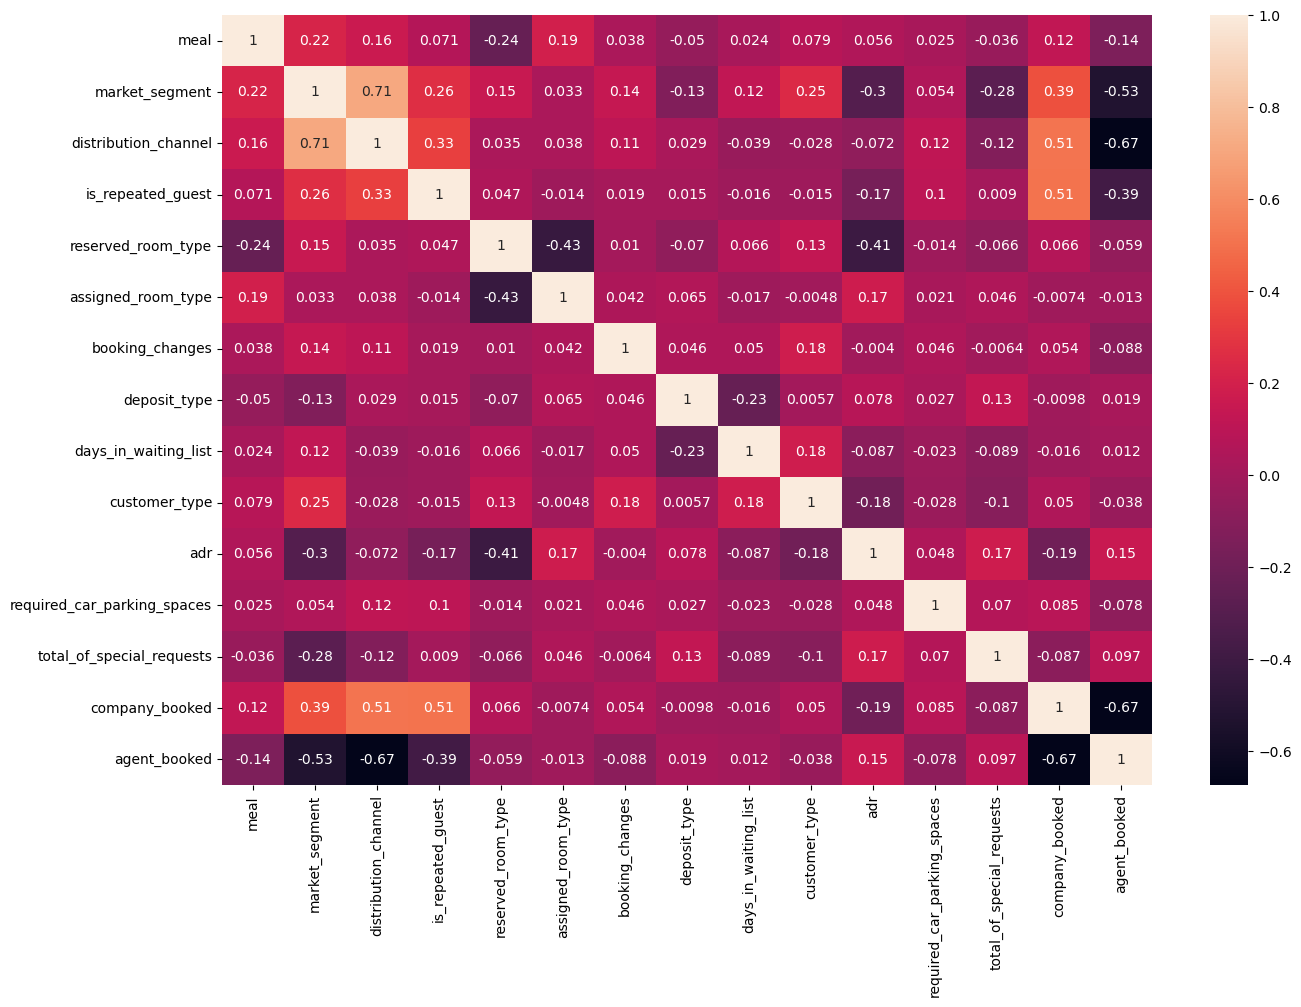

In [190]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_city.select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

Berdasarkan heatmap korelasi yang ditampilkan, berikut adalah beberapa poin penting:

- **Nilai Korelasi**: Sebagian besar pasangan fitur memiliki nilai korelasi yang sangat rendah atau mendekati nol, menunjukkan bahwa hubungan linier antara fitur-fitur tersebut lemah. Tidak ada fitur yang memiliki korelasi mendekati 1 atau -1, yang biasanya merupakan indikasi multikolinearitas.
  
- **Beberapa Pasangan dengan Korelasi Cukup Tinggi**:
  - `market_segment` dan `distribution_channel` memiliki korelasi sekitar 0.71, yang menunjukkan hubungan yang cukup kuat. Namun, ini mungkin masih dapat diterima tergantung pada model yang digunakan.
  - `company_booked` dan `agent_booked` menunjukkan korelasi negatif yang cukup tinggi (-0.67), tetapi nilai ini masih di bawah ambang batas umum yang digunakan untuk mengidentifikasi multikolinearitas yang berbahaya.

Terkait ambang batas multikolineritas:
- Merujuk pada buku "Applied Linear Statistical Models" oleh Kutner, Nachtsheim, Neter, dan Li menyebutkan penggunaan nilai korelasi 0.8 sebagai tanda bahwa mungkin ada multikolinearitas yang perlu diatasi.

> ## **Dataset *Resort Hotel***

> ### **Data Cleaning**

Proses *data cleaning* dilakukan kembali karena dataset awal `df_raw` telah dibagi menjadi dua subset berdasarkan jenis hotel, yaitu `City Hotel` dan `Resort Hotel`. Akibatnya, untuk proses pembuatan model ini perlu dilakukan *data clenaing* ulang guna menghasilkan model yang efektif.

#### **Handling Duplicates**

Pada bagian EDA kita telah mengetahui bahwa dataset ini memiliki data *duplicate* sehingga setelah dibagi menjadi dua *sub-set* data ini, *duplicate* tersebut perlu didrop agar tidak menyebabakan kinerja *machine learning* menjadi bias.

In [195]:
# menghitung jumlah data yang duplikat pada dataset City Hotel
count_duplikat_resort = data_train_resort.duplicated().sum()

# mendrop data duplikat dataset City Hotel
data_train_resort1 = data_train_resort.drop_duplicates()


print(f'Jumlah total entries pada sub-set data train city hotel adalah {data_train_resort.shape[0]}')
print(f'Jumlah entries duplicate pada sub-set data train city hotel adalah {count_duplikat_resort}')
print(f'Jumlah total entries pada sub-set data train city hotel setelah drop duplicate adalah {data_train_resort1.shape[0]}')


Jumlah total entries pada sub-set data train city hotel adalah 30045
Jumlah entries duplicate pada sub-set data train city hotel adalah 4082
Jumlah total entries pada sub-set data train city hotel setelah drop duplicate adalah 25963


#### **Handling Missing Value**

Pada bagian EDA kita telah mengetahui bahwa dataset ini memiliki data *missing value* sehingga setelah diperlukan pertimbangan untuk mengisinya dengan *mean / median / modus* atau mendrop *missing value* tersebut.

In [197]:
# menampilkan persentase missing value pada dataset City Hotel
missing_percentage_resort = (data_train_resort1.isna().sum() / len(data_train_resort1) * 100)
missing_percentage_resort = missing_percentage_resort.sort_values(ascending=False).round(2).astype(str) + ' %'
missing_percentage_resort

company                           92.6 % 
agent                             19.52 %
country                           1.26 % 
hotel                             0.0 %  
previous_cancellations            0.0 %  
reservation_status                0.0 %  
total_of_special_requests         0.0 %  
required_car_parking_spaces       0.0 %  
adr                               0.0 %  
customer_type                     0.0 %  
days_in_waiting_list              0.0 %  
deposit_type                      0.0 %  
booking_changes                   0.0 %  
assigned_room_type                0.0 %  
reserved_room_type                0.0 %  
previous_bookings_not_canceled    0.0 %  
is_repeated_guest                 0.0 %  
is_canceled                       0.0 %  
distribution_channel              0.0 %  
market_segment                    0.0 %  
meal                              0.0 %  
babies                            0.0 %  
children                          0.0 %  
adults                            

#### **Penanganan Missing Value pada Data Train untuk Resort Hotel**

Pada data train untuk **Resort Hotel**, terdapat missing value pada beberapa kolom penting, yaitu: `company`, `agent`, `country`, dan `children`. Penanganan missing value ini dilakukan dengan strategi yang berbeda tergantung pada konteks dan makna fitur tersebut.

1. **Kolom `company` dan `agent`**:
   - Kolom `company` dan `agent` menunjukkan apakah pelanggan memesan kamar melalui perusahaan atau agen tertentu.
   - Untuk menangani missing value pada kolom ini, kita akan menambahkan kolom baru yang akan berfungsi sebagai penanda.
     - Kolom tambahan ini akan memiliki nilai **1** jika pelanggan memesan melalui `company` atau `agent`.
     - Sebaliknya, jika kolom tersebut memiliki missing value, maka kolom tambahan akan diisi dengan **0**, yang menunjukkan bahwa pelanggan tidak memesan melalui perusahaan atau agen.
   - Dengan pendekatan ini, kita dapat memanfaatkan informasi dari missing value sebagai fitur tambahan dalam model.

2. **Kolom `country` dan `children`**:
   - Untuk kolom `country` *missing value* akan diisi dengan nilai `'Undefined'` sedangkan ntuk kolom `children` *missing value* akan diisi dengan nilai `0`. Ini digunakan untuk menangani ketidakpastian atau kurangnya informasi dari data asli.
   - Upaya ini dilakukan untuk membantu memastikan bahwa semua data dapat diproses oleh model tanpa mempengaruhi hasil prediksi secara signifikan, serta menjaga agar informasi tidak hilang begitu saja.

#### **Handling Outliers**

Pada bagian EDA, kita telah mengetahui bahwa dataset ini memiliki outliers pada beberapa fitur. Kita akan mengecek kembali dan mempertimbangkan *treatment* apa yang akan diberikan.

In [200]:
# menampilkan proporsi outlier secara detail pada feature numerikal
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

numerical_resort = data_train_resort1[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                'adr', 'required_car_parking_spaces', 'total_of_special_requests']]

for feature in numerical_resort.columns: 
    IQR = numerical_resort[feature].quantile(0.75) - numerical_resort[feature].quantile(0.25)
    lower_fence = numerical_resort[feature].quantile(0.25) - 1.5 * IQR
    upper_fence = numerical_resort[feature].quantile(0.75) + 1.5 * IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(numerical_resort[numerical_resort[feature] < lower_fence]))
    number_inside.append(len(numerical_resort[(numerical_resort[feature] >= lower_fence) & (numerical_resort[feature] <= upper_fence)]))
    number_upper.append(len(numerical_resort[numerical_resort[feature] > upper_fence]))
    percentage_outlier.append(round((len(numerical_resort[numerical_resort[feature] < lower_fence]) + len(numerical_resort[numerical_resort[feature] > upper_fence])) / len(numerical_resort) * 100, 2))

# membuat DataFrame untuk menamilkan hasil"
outliers_resort = pd.DataFrame({
    "Attribute (Numerical Features)": numerical_resort.columns, 
    "Lower Fence": list_lower,
    "Upper Fence": list_upper,
    "# Lower": number_lower,
    "# Inside": number_inside,
    "# Upper": number_upper,
    "% Outlier": percentage_outlier
})

outliers_resort


,Attribute (Numerical Features),Lower Fence,Upper Fence,# Lower,# Inside,# Upper,% Outlier
0,lead_time,-188.5,335.5,0,25511,452,1.74
1,stays_in_weekend_nights,-3.0,5.0,0,25850,113,0.44
2,stays_in_week_nights,-5.0,11.0,0,25817,146,0.56
3,adults,2.0,2.0,4595,20277,1091,21.90
4,children,0.0,0.0,0,23377,2586,9.96
5,babies,0.0,0.0,0,25557,406,1.56
6,previous_cancellations,0.0,0.0,0,25560,403,1.55
7,previous_bookings_not_canceled,0.0,0.0,0,24478,1485,5.72
8,booking_changes,0.0,0.0,0,20620,5343,20.58
9,days_in_waiting_list,0.0,0.0,0,25856,107,0.41


##### **Proporsi Outlier pada Sejumlah Fitur Numerikal di atas:**

- **lead_time**: Memiliki sekitar 1.74% outlier yang terutama berada di atas upper fence. Ini menunjukkan bahwa ada beberapa pemesanan yang dilakukan jauh sebelumnya, lebih dari nilai yang diharapkan.
- **stays_in_weekend_nights** dan **stays_in_week_nights**: Kedua fitur ini memiliki persentase outlier yang relatif rendah (0.44% dan 0.56%), yang menunjukkan bahwa durasi menginap pada akhir pekan dan hari kerja cukup konsisten dan jarang memiliki nilai ekstrim.
- **adults**: Ini adalah fitur dengan jumlah outlier tertinggi (21.90%), menunjukkan bahwa ada banyak pemesanan yang dilakukan untuk jumlah orang dewasa yang jauh lebih besar dari biasanya, yang bisa jadi untuk acara kelompok atau konferensi.
- **children** dan **babies**: Kedua fitur ini juga memiliki persentase outlier yang cukup signifikan, yang mengindikasikan adanya pemesanan yang tidak biasa dengan jumlah anak-anak atau bayi yang lebih banyak dari biasanya.
- **adr (Average Daily Rate)**: Fitur ini menunjukkan 2.20% outlier, yang menunjukkan variasi besar dalam tarif harian yang mungkin dipengaruhi oleh musim, ketersediaan, atau faktor lainnya.
- **required_car_parking_spaces** dan **total_of_special_requests**: Fitur ini juga memiliki sejumlah outlier, meskipun tidak setinggi fitur lain. Ini bisa mencerminkan kebutuhan khusus atau preferensi dari segmen tertentu dari pelanggan.

##### **Decision on Handling Outliers:**

Outlier tidak dihapus karena menghapus outlier berisiko menghilangkan informasi penting yang mungkin merepresentasikan variasi data yang valid. Outlier dalam kolom-kolom dataset ini mungkin mencerminkan keadaan khusus atau kasus unik yang penting untuk dianalisis. Misalnya, outlier dapat menunjukkan segmen pelanggan yang berbeda atau situasi luar biasa yang harus diperhatikan dalam model. Namun, kita akan tetap menangani data yang tampak anomali dengan hati-hati menggunakan *domain knowledge* untuk memastikan bahwa outlier yang benar-benar tidak relevan atau mengganggu dapat diidentifikasi dan dikelola dengan tepat.

#### **Handling Data Entry Errors**

Bagian ini menunjukan lanjutan proses dari *handling outlier* dimana *handling data entry error* ini sama seperti bagian *identifying and handling data entry error* di EDA. Hal ini dilakukan kembali karena datasetnya telah displit ke dalam dua sub-set sehinggap perlu untuk mengecek kembali apakah terdapat nilai pada suatu kolom yang tidak masuk akal.

**Mengecek kesesuaian kolom `is_canceled` dan `reservation_status`**

In [205]:
# Menampilkan kolom is_canceled yang bernilai 1 dan reservation_status bernilai Canceled
data_train_resort1[(data_train_resort1["is_canceled"] == 0) & (data_train_resort1["reservation_status"] == 'Canceled')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [206]:
# Menampilkan kolom is_canceled yang bernilai 0 dan reservation_status bernilai No-Show
data_train_resort1[(data_train_resort1["is_canceled"] == 0) & (data_train_resort1["reservation_status"] == 'No-Show')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [207]:
# Menampilkan kolom is_canceled yang bernilai 1 dan reservation_status bernilai Check-Out
data_train_resort1[(data_train_resort1["is_canceled"] == 1) & (data_train_resort1["reservation_status"] == 'Check-Out')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


**Menghapus pemesanan dengan nilai 0 pada kolom `adults`, `children`, dan `babies`**

In [209]:
# Menampilkan kolom adults, children, babies yang bernilai 0
data_train_resort1[(data_train_resort1["adults"] == 0) & (data_train_resort1["children"] == 0) & (data_train_resort1["babies"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
32827,Resort Hotel,0,46,2017,January,4,25,3,9,0,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,I,8,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-02-06
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,NaN,174.0,0,Transient,0.0,0,0,Check-Out,2015-10-12
37459,Resort Hotel,0,1,2017,June,25,18,2,5,0,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,I,6,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-06-25
34855,Resort Hotel,0,15,2017,March,13,30,2,6,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,523.0,0,Transient-Party,0.0,0,0,Check-Out,2017-04-07
32029,Resort Hotel,0,4,2017,January,2,14,0,1,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,G,0,No Deposit,168.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-01-15
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15


Pada dataset terdapat entri di mana jumlah tamu tercatat sebagai 0. Hal ini tidak mungkin secara logis, karena jika ada pemesanan kamar hotel, seharusnya ada minimal 1 tamu yang menginap. Oleh karena itu, data yang akan digunakan untuk analisis dan pemodelan adalah data di mana total jumlah tamu lebih dari 0. Dengan demikian, kita memastikan bahwa data yang digunakan merepresentasikan skenario yang valid dan masuk akal dalam konteks pemesanan hotel.

In [211]:
data_train_resort1.drop(data_train_resort1[(data_train_resort1["adults"] == 0) & 
             (data_train_resort1["children"] == 0) & 
             (data_train_resort1["babies"] == 0)].index, inplace=True)

**Menghapus jumlah hari menginap bernilai 0 pada kolom `stays_in_weekend_nights` dan `stays_in_week_nights`**

In [213]:
# Menampilkan kolom stays_in_weekend_nights bernilai 0 tapi kolom stays_in_week_nights bernilai 0
data_train_resort1[(data_train_resort1["stays_in_weekend_nights"] == 0) & (data_train_resort1["stays_in_week_nights"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
32850,Resort Hotel,0,0,2017,February,6,7,0,0,1,0.0,0,BB,PRT,Online TA,TA/TO,1,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,0.0,0,0,Check-Out,2017-02-07
29927,Resort Hotel,0,6,2016,November,46,9,0,0,2,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,I,1,No Deposit,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2016-11-09
35354,Resort Hotel,0,1,2017,April,16,20,0,0,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,D,0,No Deposit,NaN,195.0,0,Transient-Party,0.0,0,0,Check-Out,2017-04-20
29728,Resort Hotel,0,18,2016,November,45,4,0,0,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,I,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2016-11-04
894,Resort Hotel,0,1,2015,August,32,4,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,F,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37866,Resort Hotel,0,17,2017,July,26,1,0,0,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,I,1,No Deposit,240.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-07-01
21305,Resort Hotel,0,0,2016,February,9,25,0,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,0,A,E,0,No Deposit,NaN,287.0,0,Transient,0.0,0,0,Check-Out,2016-02-25
22030,Resort Hotel,0,7,2016,March,12,16,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,I,0,No Deposit,240.0,NaN,0,Transient,0.0,0,0,Check-Out,2016-03-16
3471,Resort Hotel,0,113,2015,December,51,18,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,I,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-12-18


In [214]:
# Menampilkan kolom stays_in_weekend_nights > 5 tapi kolom stays_in_week_nights bernilai 0
data_train_resort1[(data_train_resort1["stays_in_weekend_nights"] > 5) & (data_train_resort1["stays_in_week_nights"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


Pada dataset terdapat entri di mana jumlah hari menginap tercatat sebagai 0. Hal ini secara logis tidak mungkin terjadi, karena jika seorang pelanggan menginap di sebuah hotel, seharusnya jumlah hari menginapnya lebih dari 0. Oleh karena itu, data yang mencatat jumlah hari menginap sebesar 0 akan dihapus dari dataset. Langkah ini diambil untuk memastikan bahwa analisis dan model yang dibangun hanya berdasarkan data yang valid dan representatif dari skenario nyata pemesanan hotel.

In [216]:
data_train_resort1.drop(data_train_resort1[(data_train_resort1["stays_in_weekend_nights"] == 0) & 
        (data_train_resort1["stays_in_week_nights"] == 0)].index, inplace=True)

**Menghapus nilai `adr` yang tidak masuk akal**

In [218]:
data_train_resort1[data_train_resort1['adr'] == data_train_resort1['adr'].min()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


Nilai 0 mungkin terjadi dalam kasus di mana hotel tidak mendapatkan keuntungan dari penjualan kamar. Hal ini dapat terjadi karena kemungkinan seperti, kamar merupakan bagian dari bonus paket.

In [220]:
data_train_resort1[data_train_resort1['adr'] == data_train_resort1['adr'].max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,450.0,0,0,Canceled,2016-07-22


In [221]:
pd.DataFrame(data_train_resort1['adr'].unique(), columns=['adr']).sort_values(by='adr', ascending=False)

,adr
1147,450.00
1307,437.00
1137,426.25
987,402.00
4874,397.38
...,...
4633,1.80
476,1.56
3227,0.26
16,0.00


Pada dataset Resort Hotel, terdapat entri di mana nilai minimal `adr` (Average Daily Rate) mencapai -6.38 Euro. Nilai adr tidak seharusnya minus paling tidak 0 sehingga record ini diputuskan didrop. Langkah ini diambil untuk memastikan bahwa analisis dan model yang dibangun didasarkan pada data yang lebih representatif dan bebas dari pengaruh outlier ekstrem yang tidak realistis.

In [223]:
data_train_resort2 = data_train_resort1.loc[data_train_resort1['adr'] >= 0]
data_train_resort2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
17110,Resort Hotel,0,47,2015,September,39,22,0,3,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,156.0,NaN,0,Contract,85.50,0,0,Check-Out,2015-09-25
13315,Resort Hotel,1,199,2017,August,32,8,1,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,168.00,0,1,Canceled,2017-02-04
32996,Resort Hotel,0,4,2017,February,6,11,0,1,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,68.00,0,1,Check-Out,2017-02-12
19068,Resort Hotel,0,11,2015,December,49,5,2,1,1,0.0,0,Undefined,ESP,Groups,TA/TO,0,0,0,A,A,1,No Deposit,350.0,NaN,0,Transient-Party,21.00,0,0,Check-Out,2015-12-08
39919,Resort Hotel,0,42,2017,August,34,23,2,7,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,314.0,NaN,0,Transient,205.18,0,0,Check-Out,2017-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17178,Resort Hotel,0,13,2015,September,40,28,1,0,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,241.0,NaN,0,Transient,82.23,1,0,Check-Out,2015-09-29
26533,Resort Hotel,0,175,2016,July,31,25,3,6,2,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,71.0,NaN,0,Transient,128.00,0,0,Check-Out,2016-08-03
29123,Resort Hotel,0,3,2016,October,43,20,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,F,0,No Deposit,NaN,458.0,0,Transient,50.00,1,0,Check-Out,2016-10-21
3004,Resort Hotel,1,40,2015,November,46,11,0,4,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,1,No Deposit,185.0,281.0,0,Transient-Party,36.00,0,0,Canceled,2015-11-11


**Menghapus pemesanan `required_car_parking_spaces` yang tidak sesuai**

In [225]:
data_train_resort2['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    21605
1    4069 
2    20   
8    2    
Name: count, dtype: int64

In [226]:
data_train_resort2[data_train_resort2['required_car_parking_spaces']==8]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,NaN,NaN,122,Transient-Party,80.0,8,0,Check-Out,2017-03-23
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,I,1,No Deposit,NaN,NaN,0,Transient-Party,40.0,8,1,Check-Out,2017-03-19


Pada dataset terdapat data dimana jumlah pengunjung (adult) tidak senilai dengan permintaan parkir mobil yang dibutuhkan. Oleh karena itu data diputuskan untuk dihapus.

In [228]:
data_train_resort3 = data_train_resort2.loc[data_train_resort2['required_car_parking_spaces'] < 8]
data_train_resort3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
17110,Resort Hotel,0,47,2015,September,39,22,0,3,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,156.0,NaN,0,Contract,85.50,0,0,Check-Out,2015-09-25
13315,Resort Hotel,1,199,2017,August,32,8,1,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,168.00,0,1,Canceled,2017-02-04
32996,Resort Hotel,0,4,2017,February,6,11,0,1,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,68.00,0,1,Check-Out,2017-02-12
19068,Resort Hotel,0,11,2015,December,49,5,2,1,1,0.0,0,Undefined,ESP,Groups,TA/TO,0,0,0,A,A,1,No Deposit,350.0,NaN,0,Transient-Party,21.00,0,0,Check-Out,2015-12-08
39919,Resort Hotel,0,42,2017,August,34,23,2,7,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,314.0,NaN,0,Transient,205.18,0,0,Check-Out,2017-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17178,Resort Hotel,0,13,2015,September,40,28,1,0,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,241.0,NaN,0,Transient,82.23,1,0,Check-Out,2015-09-29
26533,Resort Hotel,0,175,2016,July,31,25,3,6,2,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,71.0,NaN,0,Transient,128.00,0,0,Check-Out,2016-08-03
29123,Resort Hotel,0,3,2016,October,43,20,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,F,0,No Deposit,NaN,458.0,0,Transient,50.00,1,0,Check-Out,2016-10-21
3004,Resort Hotel,1,40,2015,November,46,11,0,4,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,1,No Deposit,185.0,281.0,0,Transient-Party,36.00,0,0,Canceled,2015-11-11


**Menghapus jumlah `babies` yang tidak sesuai**

In [230]:
data_train_resort3['babies'].value_counts()

babies
0    25289
1    399  
2    6    
Name: count, dtype: int64

In [231]:
data_train_resort3[data_train_resort3['babies']>2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


**Menyesuaikan unique value `meal`**

In [233]:
data_train_resort3['meal'].value_counts()

meal
BB           20139
HB           4847 
Undefined    387  
FB           269  
SC           52   
Name: count, dtype: int64

Pada kolom `meal` terdapat unique value Undefined dan disini dapat diganti dengan SC dikarenakan keduanya dapat diasumsikan memiliki arti yang sama yaitu tidak memesan makanan.

In [235]:
# Mengganti hasil Undefined menjadi SC
data_train_resort3["meal"] = data_train_resort3["meal"].replace("Undefined", "SC")

data_train_resort3['meal'].value_counts()

meal
BB    20139
HB    4847 
SC    439  
FB    269  
Name: count, dtype: int64

> ### **Feature Engineering**

In [237]:
# menampilkan nama kolom dan jumlah baris serta kolom
display(data_train_resort3.columns, data_train_resort3.shape)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

(25694, 32)

#### **Skema Feature Engineering**

Untuk memastikan bahwa data siap digunakan dalam pemodelan, kita akan menerapkan skema pemrosesan data sebagai berikut:

1. **Encoding**: 
   - Fitur-fitur kategorikal akan diubah menjadi format numerik yang dapat digunakan oleh algoritma machine learning. Teknik encoding yang digunakan melibatkan pengurutan kategori berdasarkan hubungan statistiknya dengan target variabel. Hal ini dilakukan dengan menggunakan teknik `np.where()` untuk memastikan bahwa urutan kategori sesuai dengan rata-rata target (mean). Teknik ini mirip dengan *Ordinal Encoding*, tetapi dengan penyesuaian tambahan untuk memastikan bahwa urutan kategori benar-benar mencerminkan hubungan yang tepat dengan target.
   - Fitur-fitur yang akan di-encode adalah:
     - `market_segment`
     - `deposit_type`
     - `customer_type`
     - `reserved_room_type`
     - `assigned_room_type`
     - `meal`
     - `distribution_channel`

2. **Scaling**: 
   - Fitur-fitur numerik akan diubah ke dalam skala tertentu guna memastikan bahwa semua fitur berada dalam rentang yang sama atau untuk mengurangi pengaruh outlier. Teknik scaling yang digunakan adalah **RobustScaler**. RobustScaler adalah teknik normalisasi yang lebih tahan terhadap outlier dibandingkan dengan standardisasi biasa, karena menggunakan nilai median dan interquartile range (IQR) dalam proses scaling. Fitur-fitur yang akan di-scaling adalah:
     - `required_car_parking_spaces`
     - `total_of_special_requests`
     - `days_in_waiting_list`
     - `booking_changes`
     - `adr`

Dengan menerapkan skema pemrosesan ini, kita dapat memastikan bahwa data yang digunakan dalam model berada dalam format yang optimal. Ini memungkinkan model untuk menangkap hubungan penting antar variabel dan meminimalkan dampak outlier yang bisa mengganggu kinerja model. Hasil akhirnya adalah model yang lebih akurat dan andal dalam memprediksi pembatalan pemesanan.


### **1. Encoding**

**Fitur `market_segment`**

In [241]:
data_train_resort3['market_segment'].value_counts()

market_segment
Online TA        12541
Offline TA/TO    4981 
Direct           4666 
Groups           1865 
Corporate        1501 
Complementary    140  
Name: count, dtype: int64

In [242]:
data_train_resort3.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)

market_segment
Online TA        0.342875
Groups           0.208579
Complementary    0.171429
Direct           0.134376
Corporate        0.127915
Offline TA/TO    0.123469
Name: is_canceled, dtype: float64

**Fitur `deposit_type`**

In [244]:
data_train_resort3['deposit_type'].value_counts()

deposit_type
No Deposit    25438
Non Refund    176  
Refundable    80   
Name: count, dtype: int64

In [245]:
data_train_resort3.groupby('deposit_type')['is_canceled'].mean().sort_values(ascending=False)

deposit_type
Non Refund    0.863636
No Deposit    0.235121
Refundable    0.175000
Name: is_canceled, dtype: float64

**Fitur `customer_type`**

In [247]:
data_train_resort3['customer_type'].value_counts()

customer_type
Transient          20555
Transient-Party    3683 
Contract           1260 
Group              196  
Name: count, dtype: int64

In [248]:
data_train_resort3.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False)

customer_type
Transient          0.268840
Transient-Party    0.134944
Group              0.091837
Contract           0.084127
Name: is_canceled, dtype: float64

**Fitur `reserved_room_type`**

In [250]:
data_train_resort3['reserved_room_type'].value_counts()

reserved_room_type
A    14111
D    4996 
E    3459 
G    1171 
F    821  
C    682  
H    447  
L    4    
B    3    
Name: count, dtype: int64

In [251]:
data_train_resort3.groupby('reserved_room_type')['is_canceled'].mean().sort_values(ascending=False)

reserved_room_type
H    0.420582
G    0.386849
C    0.319648
E    0.258745
D    0.237590
A    0.217277
F    0.170524
B    0.000000
L    0.000000
Name: is_canceled, dtype: float64

**Fitur `assigned_room_type`**

In [253]:
data_train_resort3['assigned_room_type'].value_counts()

assigned_room_type
A    9887
D    6960
E    3900
C    1537
G    1349
F    1256
H    536 
I    152 
B    117 
Name: count, dtype: int64

In [254]:
data_train_resort3.groupby('assigned_room_type')['is_canceled'].mean().sort_values(ascending=False)

assigned_room_type
H    0.360075
G    0.340252
A    0.290887
E    0.231795
C    0.187378
D    0.180316
F    0.128981
B    0.051282
I    0.026316
Name: is_canceled, dtype: float64

**Fitur `meal`**

In [256]:
data_train_resort3['meal'].value_counts()

meal
BB    20139
HB    4847 
SC    439  
FB    269  
Name: count, dtype: int64

In [257]:
data_train_resort3.groupby('meal')['is_canceled'].mean().sort_values(ascending=False)

meal
FB    0.289963
HB    0.262224
BB    0.234917
SC    0.152620
Name: is_canceled, dtype: float64

**Fitur `distribution_channel`**

In [259]:
data_train_resort3['distribution_channel'].value_counts()

distribution_channel
TA/TO        18631
Direct       5189 
Corporate    1873 
Undefined    1    
Name: count, dtype: int64

In [260]:
data_train_resort3.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)

distribution_channel
TA/TO        0.277172
Direct       0.141260
Corporate    0.133476
Undefined    0.000000
Name: is_canceled, dtype: float64

Setelah mengecek rata-rata (mean) dari setiap *unique value* pada fitur-fitur di atas, langkah selanjutnya adalah memasukkan semua proses praproses (preprocessing) ke dalam pipeline. Ini dilakukan agar data uji (data test) mendapatkan perlakuan yang sama dengan data latih (data train). Semua langkah penanganan, mulai dari penanganan missing value, mean encoding, hingga scaling dengan RobustScaler, akan dimasukkan ke dalam pipeline preprocessing. Dengan demikian, baik data latih maupun data uji akan diproses dengan cara yang konsisten, memastikan bahwa tidak ada data yang diperlakukan berbeda dan menghindari potensi *data leakage* atau bias dalam model.

> ### **Pipeline Preprocess Dataset Resort Hotel**

In [263]:
# Custom Transformer untuk melakukan tugas spesifik
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()

        # Menangani missing values
        X['company_booked'] = (~X['company'].isna()).astype(int)
        X['agent_booked'] = (~X['agent'].isna()).astype(int)
        X['children'] = X['children'].fillna(0).astype(int)
        X['country'] = X['country'].fillna('Undefined')
        
        # Encoding kolom
        X['market_segment'] = np.where(X['market_segment'] == 'Online TA', 1,
                                        np.where(X['market_segment'] == 'Groups', 2,
                                        np.where(X['market_segment'] == 'Complementary', 3,
                                        np.where(X['market_segment'] == 'Direct', 4,
                                        np.where(X['market_segment'] == 'Corporate', 5,
                                        np.where(X['market_segment'] == 'Offline TA/TO', 6, 7))))))

        X['deposit_type'] = np.where(X['deposit_type'] == 'Non Refund', 1,
                                     np.where(X['deposit_type'] == 'No Deposit', 2, 3))

        X['customer_type'] = np.where(X['customer_type'] == 'Transient', 1,
                                      np.where(X['customer_type'] == 'Transient-Party', 2,
                                      np.where(X['customer_type'] == 'Group', 3, 4)))

        X['reserved_room_type'] = np.where(X['reserved_room_type'] == 'H', 1,
                                           np.where(X['reserved_room_type'] == 'G', 2,
                                           np.where(X['reserved_room_type'] == 'C', 3,
                                           np.where(X['reserved_room_type'] == 'E', 4,
                                           np.where(X['reserved_room_type'] == 'D', 5,
                                           np.where(X['reserved_room_type'] == 'A', 6,
                                           np.where(X['reserved_room_type'] == 'F', 7,
                                           np.where(X['reserved_room_type'] == 'B', 8, 9))))))))

        X['assigned_room_type'] = np.where(X['assigned_room_type'] == 'H', 1,
                                           np.where(X['assigned_room_type'] == 'G', 2,
                                           np.where(X['assigned_room_type'] == 'A', 3,
                                           np.where(X['assigned_room_type'] == 'E', 4,
                                           np.where(X['assigned_room_type'] == 'C', 5,
                                           np.where(X['assigned_room_type'] == 'D', 6,
                                           np.where(X['assigned_room_type'] == 'F', 7,
                                           np.where(X['assigned_room_type'] == 'B', 8, 9))))))))

        X['meal'] = np.where(X['meal'] == 'FB', 1,
                             np.where(X['meal'] == 'HB', 2,
                             np.where(X['meal'] == 'BB', 3, 4)))

        X['distribution_channel'] = np.where(X['distribution_channel'] == 'TA/TO', 1,
                                              np.where(X['distribution_channel'] == 'Direct', 2,
                                              np.where(X['distribution_channel'] == 'Corporate', 3, 4)))
        
        return X

# Feature lists
numerical_features = ['required_car_parking_spaces', 'total_of_special_requests','days_in_waiting_list','booking_changes','adr']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ], remainder='passthrough')

# Final pipeline
full_pipeline = Pipeline(steps=[
    ('custom', CustomTransformer()),   # Custom transformations
    ('preprocessor', preprocessor)     # Preprocessing pipeline
])

# Example usage
X_preprocessed_resort = full_pipeline.fit_transform(data_train_resort3)

In [264]:
# Transformasikan data menggunakan CustomTransformer saja
custom_transformer = CustomTransformer()
X_transformed_train_resort = custom_transformer.fit_transform(data_train_resort3)
X_transformed_test_resort = custom_transformer.fit_transform(data_test_resort)


# Cek apakah kolom-kolom baru sudah ada
print(X_transformed_train_resort.columns)
print(X_transformed_test_resort.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'company_booked',
       'agent_booked'],
      dtype='object')
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'ba

> ### **Feature Selection**

Beberapa fitur akan dihapus dan tidak digunakan untuk memprediksi pembatalan pemesanan hotel. Keputusan ini didasarkan pada pemahaman bisnis dan data, dengan mempertimbangkan relevansi fitur terhadap keputusan pembatalan. Berikut adalah alasan di balik penghapusan masing-masing fitur:

1. **`arrival_date_year`, `arrival_date_month`, `arrival_date_week_number`, `arrival_date_day_of_month`, `lead_time`, `stays_in_weekend_nights`, `stays_in_week_nights`**:
   - Waktu terkait pemesanan tidak dianggap sebagai faktor yang signifikan dalam keputusan pembatalan pemesanan hotel. Faktor lain seperti perilaku pelanggan dan kondisi ekonomi mungkin lebih relevan daripada tanggal atau durasi menginap.

2. **`reservation_status`, `reservation_status_date`**:
   - Fitur-fitur ini dapat menyebabkan *data leakage* jika dimasukkan ke dalam model, karena mereka secara langsung terkait dengan keputusan pembatalan. Menggunakan data ini akan memberikan informasi yang seharusnya tidak tersedia pada saat prediksi, yang dapat menyebabkan model tidak akurat di dunia nyata.

3. **`previous_cancellations`, `previous_bookings_not_canceled`**:
   - Fitur-fitur ini memiliki arti yang mirip dengan `is_repeated_guest`, yang menunjukkan apakah pelanggan adalah pelanggan yang sering menginap atau tidak. Untuk menghindari redundansi dan mempertahankan fokus, hanya fitur `is_repeated_guest` yang akan digunakan dalam model.

4. **`company`, `agent`**:
   - Kolom ini hanya berisi ID yang tidak memberikan informasi kontekstual yang berguna untuk memprediksi pembatalan pemesanan. ID ini tidak memiliki pengaruh langsung terhadap keputusan pembatalan.

5. **`country`**:
   - Fitur ini mengandung informasi tentang negara asal pelanggan. Namun, asal negara pelanggan tidak dianggap sebagai faktor penentu dalam keputusan pembatalan pemesanan hotel, sehingga tidak akan digunakan dalam model.

6. **`adults`, `children`, `babies`**:
   - Fitur-fitur ini mencatat jumlah orang dewasa, anak-anak, dan bayi yang menginap dalam satu pemesanan. Meskipun informasi ini berguna untuk layanan hotel, mereka tidak dianggap relevan dalam memprediksi pembatalan pemesanan.

Dengan menghapus fitur-fitur yang dianggap tidak relevan atau berpotensi menyebabkan *data leakage*, kita dapat lebih fokus pada fitur-fitur yang benar-benar signifikan dan relevan dalam memprediksi pembatalan pemesanan. Pendekatan ini akan membantu membangun model yang lebih akurat dan dapat diandalkan.


In [267]:
# menyiapkan X dan y dari dataset Resort Hotel
# Data Train
X_train_resort = X_transformed_train_resort.drop(['hotel','is_canceled','arrival_date_year', 'arrival_date_month','arrival_date_week_number','arrival_date_day_of_month', 'reservation_status', 'reservation_status_date','previous_cancellations','previous_bookings_not_canceled','company','agent','lead_time','stays_in_weekend_nights' ,'stays_in_week_nights','country','adults','children','babies'], axis=1)
y_train_resort = X_transformed_train_resort['is_canceled']

# Data Test
X_test_resort = X_transformed_test_resort.drop(['hotel','is_canceled','arrival_date_year', 'arrival_date_month','arrival_date_week_number','arrival_date_day_of_month', 'reservation_status', 'reservation_status_date','previous_cancellations','previous_bookings_not_canceled','company','agent','lead_time','stays_in_weekend_nights' ,'stays_in_week_nights','country','adults','children','babies'], axis=1)
y_test_resort = X_transformed_test_resort['is_canceled']

### **Check Multicollinearity**

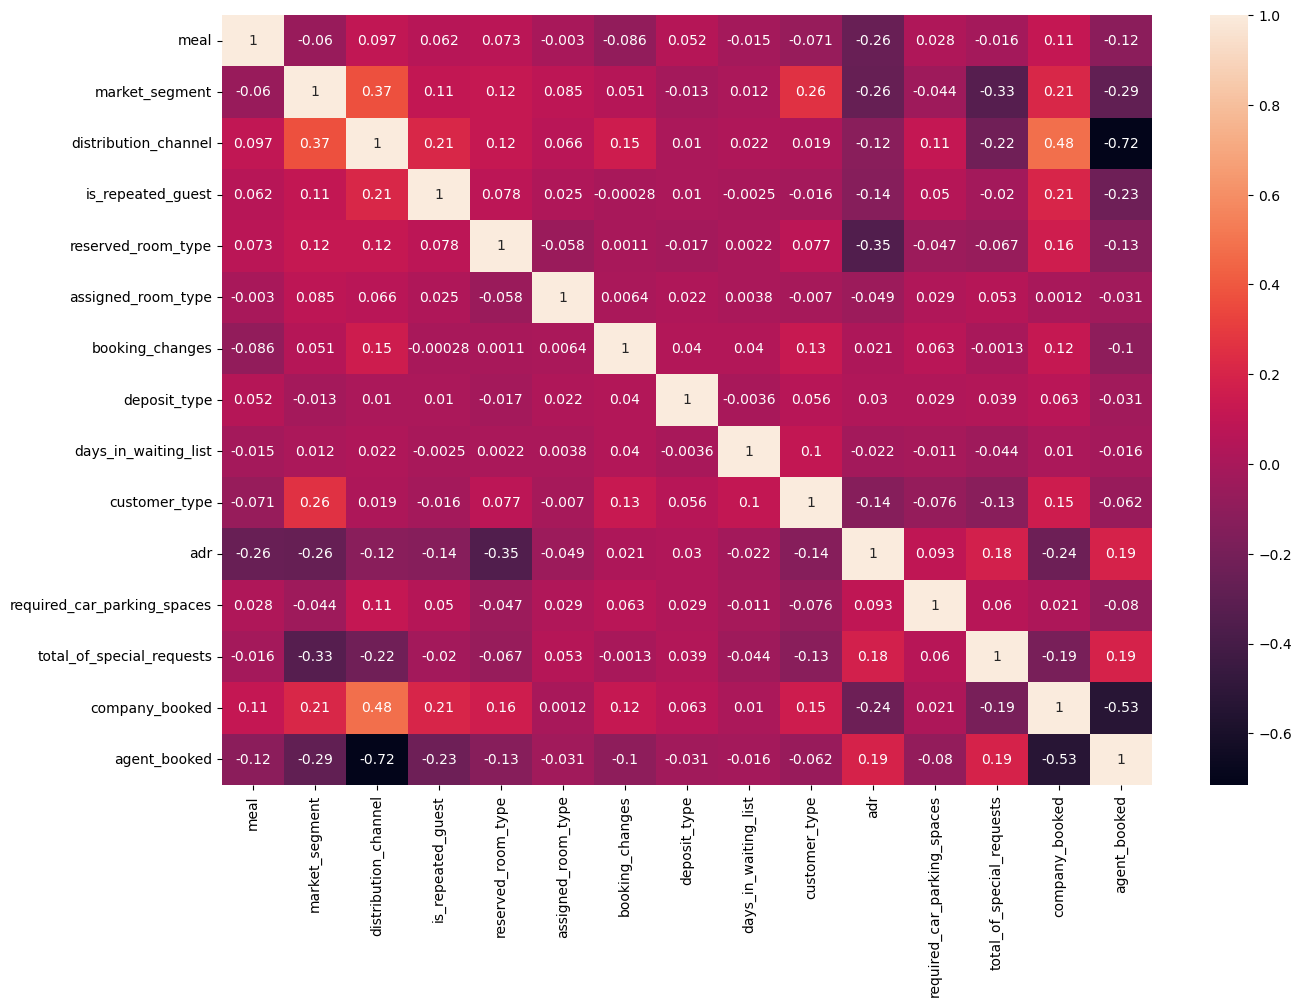

In [269]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_resort.select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

Berdasarkan heatmap korelasi yang ditampilkan, berikut adalah beberapa poin penting:

- **Nilai Korelasi**: Sebagian besar pasangan fitur memiliki nilai korelasi yang sangat rendah atau mendekati nol, menunjukkan bahwa hubungan linier antara fitur-fitur tersebut lemah. Tidak ada fitur yang memiliki korelasi mendekati 1 atau -1, yang biasanya merupakan indikasi multikolinearitas.
  
- **Beberapa Pasangan dengan Korelasi Cukup Tinggi**:
  - `market_segment` dan `distribution_channel` memiliki korelasi sekitar 0.75, yang menunjukkan hubungan yang cukup kuat. Namun, ini mungkin masih dapat diterima tergantung pada model yang digunakan.
  - `distribution_channel` dan `agent_booked` menunjukkan korelasi negatif yang cukup tinggi (-0.72), tetapi nilai ini masih di bawah ambang batas umum yang digunakan untuk mengidentifikasi multikolinearitas yang berbahaya.

Terkait ambang batas multikolineritas:
- Merujuk pada buku "Applied Linear Statistical Models" oleh Kutner, Nachtsheim, Neter, dan Li menyebutkan penggunaan nilai korelasi 0.8 sebagai tanda bahwa mungkin ada multikolinearitas yang perlu diatasi.

<hr>

## <center> **Model Building & Testing**

<hr>

> ## **Dataset *City Hotel***

In [273]:
# Definisikan model-model
logreg = LogisticRegression(random_state=37)  
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=37)
rf = RandomForestClassifier(random_state=37)
xgb = XGBClassifier(random_state=37)

models = [logreg, knn, tree, rf, xgb]
algoritma = ['Logistic Regression', 'KNN', 'Decision Tree', 'RF', 'XGBoost']

# Inisialisasi dictionary untuk hasil
hasil = {}

# Stratified K-Fold
sk_fold = StratifiedKFold(n_splits=5)

# Definisikan scorer F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Daftar untuk menyimpan metrik uji
roc_auc_score_testing = [] 
recall_score_testing = []
f1_score_testing = []
f2_score_testing = []  
class_report_testing = []
confus_matrix_testing = []
fpr_testing = []

# Loop untuk setiap model
for model, name in zip(models, algoritma): 
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Pastikan preprocessor telah didefinisikan sebelumnya
        ('model', model)
    ])
    
    # Cross-validation
    cv_results = cross_val_score(pipeline, X_train_city, y_train_city, cv=sk_fold, scoring=f2_scorer)
    
    # Melatih model
    pipeline.fit(X_train_city, y_train_city)
    
    # Prediksi
    y_pred = pipeline.predict(X_test_city)
    y_pred_proba = pipeline.predict_proba(X_test_city)[:, 1]
    confus_matrix_var = confusion_matrix(y_test_city, y_pred)
    
    # Simpan metrik uji
    roc_auc_score_testing.append(roc_auc_score(y_test_city, y_pred_proba))
    recall_score_testing.append(recall_score(y_test_city, y_pred))
    f1_score_testing.append(f1_score(y_test_city, y_pred))
    f2_score_testing.append(fbeta_score(y_test_city, y_pred, beta=2))  
    class_report_testing.append(classification_report(y_test_city, y_pred))
    confus_matrix_testing.append(confus_matrix_var)
    fpr_testing.append(confus_matrix_var[0][1] / (confus_matrix_var[0][1] + confus_matrix_var[0][0]))
    
    # Simpan hasil
    hasil[name] = {
        'cv_accuracy': cv_results.mean(),
        'accuracy': accuracy_score(y_test_city, y_pred),
        'confusion_matrix': confus_matrix_var,
        'classification_report': classification_report(y_test_city, y_pred),
        'roc_auc': roc_auc_score(y_test_city, y_pred_proba),
        'recall': recall_score(y_test_city, y_pred),
        'f1_score': f1_score(y_test_city, y_pred),
        'f2_score': fbeta_score(y_test_city, y_pred, beta=2),  
        'fpr': confus_matrix_var[0][1] / (confus_matrix_var[0][1] + confus_matrix_var[0][0])
    }

# Buat DataFrame untuk metrik uji
df_default_test = pd.DataFrame(data={
    'Algoritma': algoritma,
    'Recall': recall_score_testing,
    'F1 Score': f1_score_testing,
    'F2 Score': f2_score_testing  
})

# Tampilkan hasil
display(df_default_test)

for i, name in enumerate(algoritma):
    print(f'Nama Model: {name}\n {class_report_testing[i]}')

,Algoritma,Recall,F1 Score,F2 Score
0,Logistic Regression,0.555945,0.676071,0.598481
1,KNN,0.701426,0.738785,0.715907
2,Decision Tree,0.702272,0.743984,0.718382
3,RF,0.717496,0.750032,0.730166
4,XGBoost,0.635814,0.723996,0.668377


Nama Model: Logistic Regression
               precision    recall  f1-score   support

           0       0.75      0.94      0.83     11557
           1       0.86      0.56      0.68      8276

    accuracy                           0.78     19833
   macro avg       0.80      0.75      0.75     19833
weighted avg       0.79      0.78      0.77     19833

Nama Model: KNN
               precision    recall  f1-score   support

           0       0.80      0.86      0.83     11557
           1       0.78      0.70      0.74      8276

    accuracy                           0.79     19833
   macro avg       0.79      0.78      0.78     19833
weighted avg       0.79      0.79      0.79     19833

Nama Model: Decision Tree
               precision    recall  f1-score   support

           0       0.80      0.87      0.83     11557
           1       0.79      0.70      0.74      8276

    accuracy                           0.80     19833
   macro avg       0.80      0.78      0.79     198

Dari hasil yang ditampilkan di atas, dapat dilihat bahwa model dengan nilai F2 score tertinggi adalah model yang menggunakan algoritma Random Forest, Decision Tree, dan KNN. Nilai F2 score yang tinggi menunjukkan bahwa model-model ini memiliki kemampuan yang baik dalam menangkap kelas positif, yang sangat penting dalam konteks ini karena kita ingin meminimalkan risiko kesalahan dalam memprediksi pembatalan pemesanan.

Namun, meskipun model ini menunjukkan kinerja yang baik, kita harus mempertimbangkan adanya ketidakseimbangan kelas dalam data. Ketidakseimbangan ini dapat menyebabkan model menjadi bias terhadap kelas mayoritas dan mengurangi kemampuannya untuk memprediksi kelas minoritas dengan akurat.

Oleh karena itu, langkah selanjutnya adalah menerapkan teknik undersampling dan oversampling pada data latih untuk menangani ketidakseimbangan kelas ini. Dengan menerapkan teknik ini pada model Random Forest, Decision Tree, dan KNN, diharapkan model dapat lebih seimbang dalam memprediksi kedua kelas dan meningkatkan kinerja prediktif keseluruhan, terutama dalam menangani kasus-kasus kelas minoritas yang sulit diprediksi.

In [275]:
# Inisialisasi model-model
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=37)
random_forest = RandomForestClassifier(random_state=37)

# Daftar model dan nama-namanya
models = [
    (knn, 'KNN'),
    (decision_tree, 'Decision Tree'),
    (random_forest, 'Random Forest')
]

# Daftar untuk menyimpan hasil metrik
results = {
    'method': [],
    'recall': [],
    'f1_score': [],
    'f2_score': []
}

# Fungsi untuk mengevaluasi model
def evaluate_model(pipeline, X_train_city, y_train_city, X_test_city, y_test_city, method_name):
    # Cross-validation dengan F2 scoring
    cv_results = cross_val_score(pipeline, X_train_city, y_train_city, cv=sk_fold, scoring=f2_scorer)
    
    # Melatih model
    pipeline.fit(X_train_city, y_train_city)
    
    # Prediksi
    y_pred = pipeline.predict(X_test_city)
    y_pred_proba = pipeline.predict_proba(X_test_city)[:, 1]
    
    # Hitung metrik
    f1 = f1_score(y_test_city, y_pred)
    recall = recall_score(y_test_city, y_pred)
    f2 = fbeta_score(y_test_city, y_pred, beta=2)
    
    # Simpan metrik
    results['method'].append(method_name)
    results['recall'].append(recall)
    results['f1_score'].append(f1)
    results['f2_score'].append(f2)
    
    # Mengembalikan laporan klasifikasi dan matriks kebingungan
    return classification_report(y_test_city, y_pred), confusion_matrix(y_test_city, y_pred)

# List untuk menyimpan laporan klasifikasi dan matriks kebingungan
reports = []
matrices = []

# Evaluasi setiap model dengan berbagai teknik sampling
for model, model_name in models:
    # Tanpa Sampling
    pipeline_no_sampling = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    report_no_sampling, matrix_no_sampling = evaluate_model(pipeline_no_sampling, X_train_city, y_train_city, X_test_city, y_test_city, f'{model_name} - No Sampling')
    reports.append((model_name, 'No Sampling', report_no_sampling))
    matrices.append((model_name, 'No Sampling', matrix_no_sampling))

    # Undersampling
    pipeline_undersampling = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('under', RandomUnderSampler(sampling_strategy=0.8, random_state=37)),
        ('model', model)
    ])
    report_undersampling, matrix_undersampling = evaluate_model(pipeline_undersampling, X_train_city, y_train_city, X_test_city, y_test_city, f'{model_name} - Undersampling')
    reports.append((model_name, 'Undersampling', report_undersampling))
    matrices.append((model_name, 'Undersampling', matrix_undersampling))

    # Oversampling
    pipeline_oversampling = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('over', SMOTE(sampling_strategy=0.5, random_state=37)),
        ('model', model)
    ])
    report_oversampling, matrix_oversampling = evaluate_model(pipeline_oversampling, X_train_city, y_train_city, X_test_city, y_test_city, f'{model_name} - Oversampling')
    reports.append((model_name, 'Oversampling', report_oversampling))
    matrices.append((model_name, 'Oversampling', matrix_oversampling))

# Membuat DataFrame untuk hasil perbandingan
df_comparison = pd.DataFrame(results)

# Tampilkan hasil perbandingan
display(df_comparison)

# Tampilkan semua laporan klasifikasi dan matriks kebingungan
for model_name, sampling, report in reports:
    print(f'{model_name} - {sampling}\n{report}\n')

for model_name, sampling, matrix in matrices:
    print(f'{model_name} - {sampling}\n{matrix}\n')


,method,recall,f1_score,f2_score
0,KNN - No Sampling,0.701426,0.738785,0.715907
1,KNN - Undersampling,0.625785,0.686733,0.648819
2,KNN - Oversampling,0.709884,0.738390,0.721018
3,Decision Tree - No Sampling,0.702272,0.743984,0.718382
4,Decision Tree - Undersampling,0.810174,0.740352,0.780722
5,Decision Tree - Oversampling,0.723417,0.744652,0.731764
6,Random Forest - No Sampling,0.717496,0.750032,0.730166
7,Random Forest - Undersampling,0.825640,0.749643,0.793465
8,Random Forest - Oversampling,0.734775,0.752925,0.741929


KNN - No Sampling
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     11557
           1       0.78      0.70      0.74      8276

    accuracy                           0.79     19833
   macro avg       0.79      0.78      0.78     19833
weighted avg       0.79      0.79      0.79     19833


KNN - Undersampling
              precision    recall  f1-score   support

           0       0.76      0.86      0.81     11557
           1       0.76      0.63      0.69      8276

    accuracy                           0.76     19833
   macro avg       0.76      0.74      0.75     19833
weighted avg       0.76      0.76      0.76     19833


KNN - Oversampling
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     11557
           1       0.77      0.71      0.74      8276

    accuracy                           0.79     19833
   macro avg       0.79      0.78      0.78     19833
weighted avg   

Setelah melakukan evaluasi terhadap berbagai model dan teknik sampling, dapat dilihat bahwa model dengan nilai **F2 score** terbaik adalah **Random Forest** yang diterapkan dengan **Undersampling**. Pendekatan ini menunjukkan kemampuan yang lebih baik dalam menangkap kelas positif dan mengurangi Type II error dibandingkan dengan model lain.

Langkah berikutnya adalah menguji apakah penerapan **hyperparameter tuning** pada model **Random Forest Undersampling** dapat lebih meningkatkan kinerja model ini. Hyperparameter tuning akan membantu menemukan kombinasi parameter yang optimal sehingga model dapat bekerja lebih akurat dan efisien dalam memprediksi pembatalan pemesanan. Dengan demikian, kita dapat memastikan bahwa model yang dipilih benar-benar optimal untuk digunakan dalam produksi.

> ## **Hyperparameter Tunning**

,Algorithm,Recall,F1 Score,F2 Score
0,Random Forest - Hyperparameter Tuning,0.827211,0.750288,0.794624


Nama Model: Random Forest - Hyperparameter Tuning
               precision    recall  f1-score   support

           0       0.85      0.73      0.79     11557
           1       0.69      0.83      0.75      8276

    accuracy                           0.77     19833
   macro avg       0.77      0.78      0.77     19833
weighted avg       0.78      0.77      0.77     19833



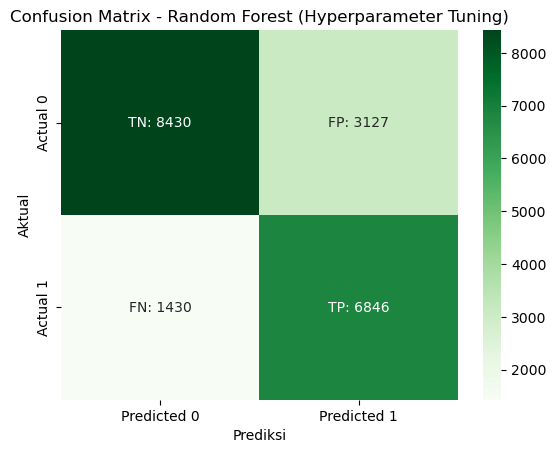

In [278]:
# Inisialisasi model RandomForest
random_forest = RandomForestClassifier(random_state=37)

# Preprocessing dan pipeline
numerical_features = ['required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list', 'booking_changes', 'adr']
numerical_transformer = Pipeline(steps=[('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_features)],
    remainder='passthrough')

# Definisikan F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Definisikan parameter distribusi untuk RandomizedSearchCV
param_dist_rf = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

# Inisialisasi StratifiedKFold untuk cross-validation
sk_fold = StratifiedKFold(n_splits=5, random_state=37, shuffle=True)

# Inisialisasi dictionary untuk hasil
results = {}

# Daftar untuk menyimpan metrik uji
roc_auc_score_testing = []
recall_score_testing = []
f1_score_testing = []
f2_score_testing = []
class_report_testing = []
confus_matrix_testing = []

# Definisikan pipeline dengan RandomUnderSampler dan Random Forest
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('under', RandomUnderSampler(sampling_strategy=0.8, random_state=37)),
    ('model', random_forest)
])

# Gunakan RandomizedSearchCV dengan fokus pada F2 score
random_search_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist_rf, cv=sk_fold, scoring=f2_scorer, n_iter=50, random_state=37)
random_search_rf.fit(X_train_city, y_train_city)

# Dapatkan model terbaik
best_model_city = random_search_rf.best_estimator_

# Cross-validation dengan model terbaik
cv_results_rf = cross_val_score(best_model_city, X_train_city, y_train_city, cv=sk_fold, scoring=f2_scorer)

# Prediksi pada data uji
y_pred_rf = best_model_city.predict(X_test_city)
y_pred_proba_rf = best_model_city.predict_proba(X_test_city)[:, 1]
confus_matrix_rf = confusion_matrix(y_test_city, y_pred_rf)

# Simpan metrik uji
roc_auc_score_testing.append(roc_auc_score(y_test_city, y_pred_proba_rf))
recall_score_testing.append(recall_score(y_test_city, y_pred_rf))
f1_score_testing.append(f1_score(y_test_city, y_pred_rf))
f2_score_testing.append(fbeta_score(y_test_city, y_pred_rf, beta=2))  
class_report_testing.append(classification_report(y_test_city, y_pred_rf))
confus_matrix_testing.append(confus_matrix_rf)

# Simpan hasil
results['Random Forest - Hyperparameter Tuning'] = {
    'cv_f2_score': cv_results_rf.mean(),
    'accuracy': accuracy_score(y_test_city, y_pred_rf),
    'confusion_matrix': confus_matrix_rf,
    'classification_report': classification_report(y_test_city, y_pred_rf),
    'roc_auc': roc_auc_score(y_test_city, y_pred_proba_rf),
    'recall': recall_score(y_test_city, y_pred_rf),
    'f1_score': f1_score(y_test_city, y_pred_rf),
    'f2_score': fbeta_score(y_test_city, y_pred_rf, beta=2) 
}

# Buat DataFrame untuk hasil uji
df_rf_test = pd.DataFrame(data={
    'Algorithm': ['Random Forest - Hyperparameter Tuning'],
    'Recall': recall_score_testing,
    'F1 Score': f1_score_testing,
    'F2 Score': f2_score_testing
})

# Tampilkan hasil uji
display(df_rf_test)

# Cetak laporan klasifikasi dan matriks kebingungan
print(f'Nama Model: Random Forest - Hyperparameter Tuning\n {class_report_testing[0]}')

# Buat confusion matrix berdasarkan hasil prediksi model Random Forest yang telah dituning
conf_matrix_rf = confus_matrix_testing[0]

# Ambil nilai TN, FP, FN, TP dari confusion matrix
tn, fp, fn, tp = conf_matrix_rf.ravel()

# Buat label untuk setiap kotak dalam confusion matrix
labels = np.array([
    [f'TN: {tn}', f'FP: {fp}'],
    [f'FN: {fn}', f'TP: {tp}']
])

# Plot heatmap dari confusion matrix dengan annotasi
sns.heatmap(
    conf_matrix_rf, 
    annot=labels, 
    fmt='', 
    cmap='Greens',  
    xticklabels=['Predicted 0', 'Predicted 1'], 
    yticklabels=['Actual 0', 'Actual 1']
)

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest (Hyperparameter Tuning)')
plt.show()


Setelah melakukan **Hyperparameter Tuning** pada model **Random Forest dengan Undersampling**, terdapat peningkatan nilai **F2 Score**. Hal ini menunjukkan bahwa model yang telah dituning lebih efektif dalam menangkap kelas positif (pembatalan pemesanan) sambil meminimalkan kesalahan tipe II (False Negatives). Oleh karena itu, model **Random Forest dengan Undersampling yang telah dituning** dipilih sebagai model terbaik untuk memprediksi pembatalan pemesanan hotel di City Hotel.

Berdasarkan hasil prediksi dari model terbaik ini, berikut adalah ringkasan dari **Confusion Matrix**:

- **True Negatives (TN)**: Sebanyak **8430** pelanggan yang sebenarnya **tidak membatalkan** pemesanan diprediksi dengan benar sebagai **tidak membatalkan**.
- **False Positives (FP)**: Sebanyak **3127** pelanggan yang sebenarnya **tidak membatalkan** pemesanan tetapi diprediksi **salah** sebagai **membatalkan**.
- **False Negatives (FN)**: Sebanyak **1430** pelanggan yang sebenarnya **membatalkan** pemesanan tetapi diprediksi **salah** sebagai **tidak membatalkan**.
- **True Positives (TP)**: Sebanyak **6846** pelanggan yang sebenarnya **membatalkan** pemesanan diprediksi dengan benar sebagai **membatalkan**.

Model ini sangat baik dalam mengidentifikasi pelanggan yang cenderung membatalkan pemesanan, membuatnya sangat cocok untuk digunakan dalam skenario operasional yang penting, seperti selama waktu puncak atau promosi khusus, di mana meminimalkan pembatalan adalah prioritas utama.


In [280]:
best_model_city

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['required_car_parking_spaces',
                                                   'total_of_special_requests',
                                                   'days_in_waiting_list',
                                                   'booking_changes',
                                                   'adr'])])),
                ('under',
                 RandomUnderSampler(random_state=37, sampling_strategy=0.8)),
                ('model',
                 RandomForestClassifier(n_estimators=150, random_state=37))])

#### **Feature Importance**

,Feature,Importance
4,adr,0.552818
1,total_of_special_requests,0.101625
6,assigned_room_type,0.068133
10,distribution_channel,0.048432
11,is_repeated_guest,0.039742
3,booking_changes,0.038295
12,market_segment,0.036387
0,required_car_parking_spaces,0.025850
9,deposit_type,0.024478
7,company_booked,0.021492


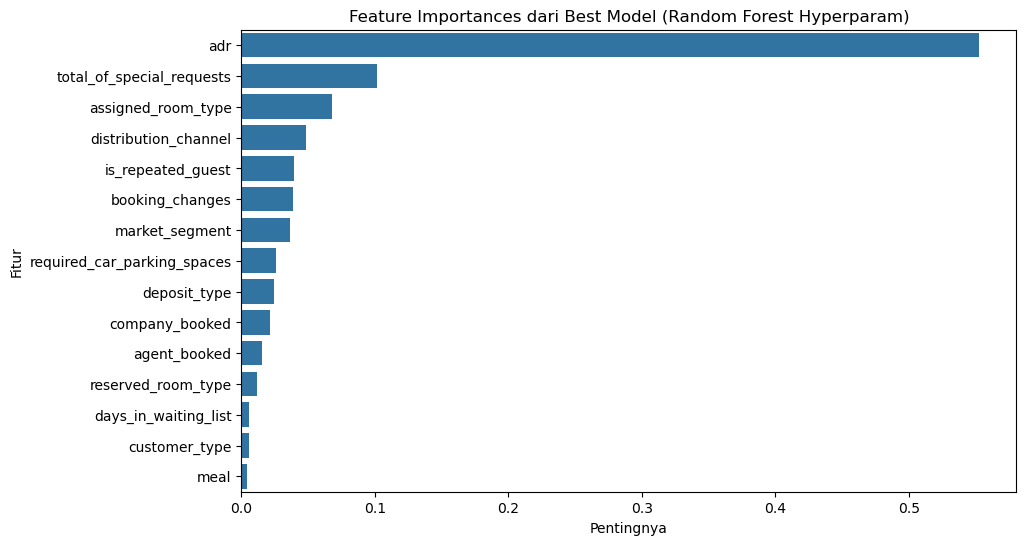

In [282]:
# Ekstrak model Random Forest terbaik dari pipeline
best_rf_model = best_model_city.named_steps['model']

# Tentukan nama fitur (fitur numerik + fitur lainnya yang digunakan dalam model)
feature_names = numerical_features + list(X_train_city.columns.difference(numerical_features))

# Hitung pentingnya fitur menggunakan atribut dari model Random Forest
importances = best_rf_model.feature_importances_

# Buat DataFrame untuk menyimpan nama fitur dan pentingnya fitur, lalu urutkan
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan DataFrame pentingnya fitur
display(feature_importances_df)

# Visualisasikan pentingnya fitur menggunakan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances dari Best Model (Random Forest Hyperparam)')
plt.xlabel('Pentingnya')
plt.ylabel('Fitur')
plt.show()


Berdasarkan hasil visualisasi *feature importance* dari model Random Forest, terdapat beberapa fitur atau kolom yang memiliki pengaruh besar dalam memprediksi pembatalan pemesanan hotel. Berikut adalah insight dari fitur-fitur yang paling berpengaruh tersebut:

1. **`adr` (Average Daily Rate)**:
   - Fitur ini memiliki pengaruh terbesar dalam model Random Forest. Hal ini menunjukkan bahwa semakin tinggi nilai `adr`, semakin besar kemungkinan terjadinya pembatalan. Ini dapat mengindikasikan bahwa pelanggan yang membayar harga lebih tinggi mungkin lebih cenderung untuk membatalkan pemesanan mereka jika mereka merasa tidak puas atau menemukan opsi lain yang lebih baik.

2. **`total_of_special_requests`**:
   - Fitur ini juga cukup berpengaruh, menunjukkan bahwa jumlah permintaan khusus yang diajukan oleh pelanggan berkorelasi dengan keputusan mereka untuk membatalkan pemesanan. Kemungkinan besar, semakin banyak permintaan khusus yang diajukan, semakin besar harapan pelanggan, yang jika tidak terpenuhi, dapat mengarah pada pembatalan.

3. **`assigned_room_type`**:
   - Tipe kamar yang ditugaskan kepada pelanggan juga merupakan faktor penting. Perbedaan antara tipe kamar yang dipesan dan yang diberikan mungkin menyebabkan ketidakpuasan, yang kemudian bisa menyebabkan pembatalan.

4. **`distribution_channel`**:
   - Saluran distribusi tempat pelanggan memesan kamar juga memengaruhi keputusan pembatalan. Misalnya, pemesanan yang dilakukan melalui agen perjalanan online (OTA) mungkin memiliki tingkat pembatalan yang lebih tinggi dibandingkan dengan pemesanan langsung.

5. **`is_repeated_guest`**:
   - Apakah pelanggan tersebut adalah tamu yang berulang atau tidak juga menjadi indikator penting. Pelanggan yang bukan tamu berulang mungkin lebih cenderung untuk membatalkan pemesanan mereka dibandingkan tamu yang sudah sering menginap di hotel tersebut.

6. **`booking_changes`**:
   - Jumlah perubahan yang dilakukan pada pemesanan juga memiliki peran dalam pembatalan. Semakin banyak perubahan yang dilakukan, semakin tinggi kemungkinan pembatalan.

7. **`market_segment`**:
   - Segmen pasar juga mempengaruhi pembatalan. Misalnya, pemesanan yang dilakukan melalui agen perjalanan online mungkin memiliki tingkat pembatalan yang lebih tinggi dibandingkan dengan segmen pasar lainnya.

Insight ini menunjukkan bahwa fitur-fitur yang berhubungan dengan harga (`adr`), ekspektasi pelanggan (`total_of_special_requests`, `assigned_room_type`), dan saluran pemesanan (`distribution_channel`) sangat penting dalam memprediksi apakah seorang pelanggan akan membatalkan pemesanan hotel mereka. Pemahaman ini dapat digunakan untuk mengembangkan strategi yang lebih baik dalam mengelola risiko pembatalan, seperti memberikan penawaran khusus kepada pelanggan yang membayar `adr` tinggi atau memberikan layanan yang lebih personal kepada pelanggan dengan banyak permintaan khusus.


> ## **Dataset *Resort Hotel***

In [285]:
# Definisikan model-model
logreg = LogisticRegression(random_state=37)  
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=37)
rf = RandomForestClassifier(random_state=37)
xgb = XGBClassifier(random_state=37)

models = [logreg, knn, tree, rf, xgb]
algoritma = ['Logistic Regression', 'KNN', 'Decision Tree', 'RF', 'XGBoost']

# Inisialisasi dictionary untuk hasil
hasil = {}

# Stratified K-Fold
sk_fold = StratifiedKFold(n_splits=5)

# Definisikan scorer F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Daftar untuk menyimpan metrik uji
roc_auc_score_testing = [] 
recall_score_testing = []
f1_score_testing = []
f2_score_testing = []  
class_report_testing = []
confus_matrix_testing = []
fpr_testing = []

# Loop untuk setiap model
for model, name in zip(models, algoritma): 
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Pastikan preprocessor telah didefinisikan sebelumnya
        ('model', model)
    ])
    
    # Cross-validation
    cv_results = cross_val_score(pipeline, X_train_resort, y_train_resort, cv=sk_fold, scoring=f2_scorer)
    
    # Melatih model
    pipeline.fit(X_train_resort, y_train_resort)
    
    # Prediksi
    y_pred = pipeline.predict(X_test_resort)
    y_pred_proba = pipeline.predict_proba(X_test_resort)[:, 1]
    confus_matrix_var = confusion_matrix(y_test_resort, y_pred)
    
    # Simpan metrik uji
    roc_auc_score_testing.append(roc_auc_score(y_test_resort, y_pred_proba))
    recall_score_testing.append(recall_score(y_test_resort, y_pred))
    f1_score_testing.append(f1_score(y_test_resort, y_pred))
    f2_score_testing.append(fbeta_score(y_test_resort, y_pred, beta=2))  # Calculate F2 score
    class_report_testing.append(classification_report(y_test_resort, y_pred))
    confus_matrix_testing.append(confus_matrix_var)
    fpr_testing.append(confus_matrix_var[0][1] / (confus_matrix_var[0][1] + confus_matrix_var[0][0]))
    
    # Simpan hasil
    hasil[name] = {
        'cv_f2_score': cv_results.mean(),
        'accuracy': accuracy_score(y_test_resort, y_pred),
        'confusion_matrix': confus_matrix_var,
        'classification_report': classification_report(y_test_resort, y_pred),
        'roc_auc': roc_auc_score(y_test_resort, y_pred_proba),
        'recall': recall_score(y_test_resort, y_pred),
        'f1_score': f1_score(y_test_resort, y_pred),
        'f2_score': fbeta_score(y_test_resort, y_pred, beta=2),  # Include F2 score
        'fpr': confus_matrix_var[0][1] / (confus_matrix_var[0][1] + confus_matrix_var[0][0])
    }

# Buat DataFrame untuk metrik uji
df_default_test = pd.DataFrame(data={
    'Algoritma': algoritma,
    'Recall': recall_score_testing,
    'F1 Score': f1_score_testing,
    'F2 Score': f2_score_testing  
})

# Tampilkan hasil
display(df_default_test)

for i, name in enumerate(algoritma):
    print(f'Nama Model: {name}\n {class_report_testing[i]}')

,Algoritma,Recall,F1 Score,F2 Score
0,Logistic Regression,0.358993,0.482475,0.399936
1,KNN,0.592086,0.626451,0.605370
2,Decision Tree,0.625899,0.636547,0.630115
3,RF,0.642806,0.660140,0.649629
4,XGBoost,0.519784,0.606124,0.551190


Nama Model: Logistic Regression
               precision    recall  f1-score   support

           0       0.79      0.95      0.87      7235
           1       0.74      0.36      0.48      2780

    accuracy                           0.79     10015
   macro avg       0.76      0.65      0.67     10015
weighted avg       0.78      0.79      0.76     10015

Nama Model: KNN
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      7235
           1       0.67      0.59      0.63      2780

    accuracy                           0.80     10015
   macro avg       0.76      0.74      0.75     10015
weighted avg       0.80      0.80      0.80     10015

Nama Model: Decision Tree
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      7235
           1       0.65      0.63      0.64      2780

    accuracy                           0.80     10015
   macro avg       0.75      0.75      0.75     100

Dari hasil yang ditampilkan di atas, dapat dilihat bahwa model dengan nilai F2 score tertinggi adalah model yang menggunakan algoritma Random Forest, Decision Tree, dan KNN. Nilai F2 score yang tinggi menunjukkan bahwa model-model ini memiliki kemampuan yang baik dalam menangkap kelas positif, yang sangat penting dalam konteks ini karena kita ingin meminimalkan risiko kesalahan dalam memprediksi pembatalan pemesanan.

Namun, meskipun model ini menunjukkan kinerja yang baik, kita harus mempertimbangkan adanya ketidakseimbangan kelas dalam data. Ketidakseimbangan ini dapat menyebabkan model menjadi bias terhadap kelas mayoritas dan mengurangi kemampuannya untuk memprediksi kelas minoritas dengan akurat.

Oleh karena itu, langkah selanjutnya adalah menerapkan teknik undersampling dan oversampling pada data latih untuk menangani ketidakseimbangan kelas ini. Dengan menerapkan teknik ini pada model Random Forest, Decision Tree, dan KNN, diharapkan model dapat lebih seimbang dalam memprediksi kedua kelas dan meningkatkan kinerja prediktif keseluruhan, terutama dalam menangani kasus-kasus kelas minoritas yang sulit diprediksi.

In [287]:
# Inisialisasi model-model
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=37)
random_forest = RandomForestClassifier(random_state=37)

# Daftar model dan nama-namanya
models = [
    (knn, 'KNN'),
    (decision_tree, 'Decision Tree'),
    (random_forest, 'Random Forest')
]

# Daftar untuk menyimpan hasil metrik
results = {
    'method': [],
    'recall': [],
    'f1_score': [],
    'f2_score': []
}

# Fungsi untuk mengevaluasi model
def evaluate_model(pipeline, X_train_resort, y_train_resort, X_test_resort, y_test_resort, method_name):
    # Cross-validation dengan F2 scoring
    cv_results = cross_val_score(pipeline, X_train_resort, y_train_resort, cv=sk_fold, scoring=f2_scorer)
    
    # Melatih model
    pipeline.fit(X_train_resort, y_train_resort)
    
    # Prediksi
    y_pred = pipeline.predict(X_test_resort)
    y_pred_proba = pipeline.predict_proba(X_test_resort)[:, 1]
    
    # Hitung metrik
    f1 = f1_score(y_test_resort, y_pred)
    recall = recall_score(y_test_resort, y_pred)
    f2 = fbeta_score(y_test_resort, y_pred, beta=2)
    
    # Simpan metrik
    results['method'].append(method_name)
    results['recall'].append(recall)
    results['f1_score'].append(f1)
    results['f2_score'].append(f2)
    
    # Mengembalikan laporan klasifikasi dan matriks kebingungan
    return classification_report(y_test_resort, y_pred), confusion_matrix(y_test_resort, y_pred)

# List untuk menyimpan laporan klasifikasi dan matriks kebingungan
reports = []
matrices = []

# Evaluasi setiap model dengan berbagai teknik sampling
for model, model_name in models:
    # Tanpa Sampling
    pipeline_no_sampling = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    report_no_sampling, matrix_no_sampling = evaluate_model(pipeline_no_sampling, X_train_resort, y_train_resort, X_test_resort, y_test_resort, f'{model_name} - No Sampling')
    reports.append((model_name, 'No Sampling', report_no_sampling))
    matrices.append((model_name, 'No Sampling', matrix_no_sampling))

    # Undersampling
    pipeline_undersampling = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('under', RandomUnderSampler(sampling_strategy=0.8, random_state=37)),
        ('model', model)
    ])
    report_undersampling, matrix_undersampling = evaluate_model(pipeline_undersampling, X_train_resort, y_train_resort, X_test_resort, y_test_resort, f'{model_name} - Undersampling')
    reports.append((model_name, 'Undersampling', report_undersampling))
    matrices.append((model_name, 'Undersampling', matrix_undersampling))

    # Oversampling
    pipeline_oversampling = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('over', SMOTE(sampling_strategy=0.5, random_state=37)),
        ('model', model)
    ])
    report_oversampling, matrix_oversampling = evaluate_model(pipeline_oversampling, X_train_resort, y_train_resort, X_test_resort, y_test_resort, f'{model_name} - Oversampling')
    reports.append((model_name, 'Oversampling', report_oversampling))
    matrices.append((model_name, 'Oversampling', matrix_oversampling))

# Membuat DataFrame untuk hasil perbandingan
df_comparison = pd.DataFrame(results)

# Tampilkan hasil perbandingan
display(df_comparison)

# Tampilkan semua laporan klasifikasi dan matriks kebingungan
for model_name, sampling, report in reports:
    print(f'{model_name} - {sampling}\n{report}\n')

for model_name, sampling, matrix in matrices:
    print(f'{model_name} - {sampling}\n{matrix}\n')


,method,recall,f1_score,f2_score
0,KNN - No Sampling,0.592086,0.626451,0.605370
1,KNN - Undersampling,0.730216,0.625096,0.684193
2,KNN - Oversampling,0.651079,0.627383,0.641389
3,Decision Tree - No Sampling,0.625899,0.636547,0.630115
4,Decision Tree - Undersampling,0.761871,0.623033,0.699518
5,Decision Tree - Oversampling,0.659353,0.641582,0.652128
6,Random Forest - No Sampling,0.642806,0.660140,0.649629
7,Random Forest - Undersampling,0.780935,0.656486,0.725893
8,Random Forest - Oversampling,0.675540,0.663604,0.670714


KNN - No Sampling
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7235
           1       0.67      0.59      0.63      2780

    accuracy                           0.80     10015
   macro avg       0.76      0.74      0.75     10015
weighted avg       0.80      0.80      0.80     10015


KNN - Undersampling
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      7235
           1       0.55      0.73      0.63      2780

    accuracy                           0.76     10015
   macro avg       0.71      0.75      0.72     10015
weighted avg       0.79      0.76      0.77     10015


KNN - Oversampling
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7235
           1       0.61      0.65      0.63      2780

    accuracy                           0.79     10015
   macro avg       0.73      0.74      0.74     10015
weighted avg   

Setelah melakukan evaluasi terhadap berbagai model dan teknik sampling, dapat dilihat bahwa model dengan nilai **F2 score** terbaik adalah **Random Forest** yang diterapkan dengan **Undersampling**. Pendekatan ini menunjukkan kemampuan yang lebih baik dalam menangkap kelas positif dan mengurangi Type II error dibandingkan dengan model lain.

Langkah berikutnya adalah menguji apakah penerapan **hyperparameter tuning** pada model **Random Forest Undersampling** dapat lebih meningkatkan kinerja model ini. Hyperparameter tuning akan membantu menemukan kombinasi parameter yang optimal sehingga model dapat bekerja lebih akurat dan efisien dalam memprediksi pembatalan pemesanan. Dengan demikian, kita dapat memastikan bahwa model yang dipilih benar-benar optimal untuk digunakan dalam produksi.

> ## **Hyperparameter Tunning**

,Algorithm,Recall,F1 Score,F2 Score
0,Random Forest - Hyperparameter Tuning,0.803597,0.670669,0.744567


Nama Model: Random Forest - Hyperparameter Tuning
               precision    recall  f1-score   support

           0       0.91      0.77      0.84      7235
           1       0.58      0.80      0.67      2780

    accuracy                           0.78     10015
   macro avg       0.74      0.79      0.75     10015
weighted avg       0.82      0.78      0.79     10015



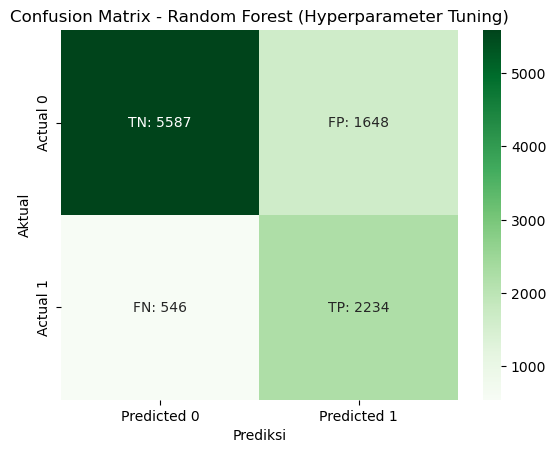

In [290]:
# Inisialisasi model RandomForest
random_forest = RandomForestClassifier(random_state=37)

# Preprocessing dan pipeline
numerical_features = ['required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list', 'booking_changes', 'adr']
numerical_transformer = Pipeline(steps=[('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_features)],
    remainder='passthrough')

# Definisikan F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Definisikan parameter distribusi untuk RandomizedSearchCV
param_dist_rf = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

# Inisialisasi StratifiedKFold untuk cross-validation
sk_fold = StratifiedKFold(n_splits=5, random_state=37, shuffle=True)

# Inisialisasi dictionary untuk hasil
results = {}

# Daftar untuk menyimpan metrik uji
roc_auc_score_testing = []
recall_score_testing = []
f1_score_testing = []
f2_score_testing = []
class_report_testing = []
confus_matrix_testing = []

# Definisikan pipeline dengan RandomUnderSampler dan Random Forest
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('under', RandomUnderSampler(sampling_strategy=0.8, random_state=37)),
    ('model', random_forest)
])

# Gunakan RandomizedSearchCV dengan fokus pada F2 score
random_search_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist_rf, cv=sk_fold, scoring=f2_scorer, n_iter=50, random_state=37)
random_search_rf.fit(X_train_resort, y_train_resort)

# Dapatkan model terbaik
best_model_resort = random_search_rf.best_estimator_

# Cross-validation dengan model terbaik
cv_results_rf = cross_val_score(best_model_resort, X_train_resort, y_train_resort, cv=sk_fold, scoring=f2_scorer)

# Prediksi pada data uji
y_pred_rf = best_model_resort.predict(X_test_resort)
y_pred_proba_rf = best_model_resort.predict_proba(X_test_resort)[:, 1]
confus_matrix_rf = confusion_matrix(y_test_resort, y_pred_rf)

# Simpan metrik uji
roc_auc_score_testing.append(roc_auc_score(y_test_resort, y_pred_proba_rf))
recall_score_testing.append(recall_score(y_test_resort, y_pred_rf))
f1_score_testing.append(f1_score(y_test_resort, y_pred_rf))
f2_score_testing.append(fbeta_score(y_test_resort, y_pred_rf, beta=2))  
class_report_testing.append(classification_report(y_test_resort, y_pred_rf))
confus_matrix_testing.append(confus_matrix_rf)

# Simpan hasil
results['Random Forest - Hyperparameter Tuning'] = {
    'cv_f2_score': cv_results_rf.mean(),
    'accuracy': accuracy_score(y_test_resort, y_pred_rf),
    'confusion_matrix': confus_matrix_rf,
    'classification_report': classification_report(y_test_resort, y_pred_rf),
    'roc_auc': roc_auc_score(y_test_resort, y_pred_proba_rf),
    'recall': recall_score(y_test_resort, y_pred_rf),
    'f1_score': f1_score(y_test_resort, y_pred_rf),
    'f2_score': fbeta_score(y_test_resort, y_pred_rf, beta=2) 
}

# Buat DataFrame untuk hasil uji
df_rf_test = pd.DataFrame(data={
    'Algorithm': ['Random Forest - Hyperparameter Tuning'],
    'Recall': recall_score_testing,
    'F1 Score': f1_score_testing,
    'F2 Score': f2_score_testing
})

# Tampilkan hasil uji
display(df_rf_test)

# Cetak laporan klasifikasi dan matriks kebingungan
print(f'Nama Model: Random Forest - Hyperparameter Tuning\n {class_report_testing[0]}')

# Buat confusion matrix berdasarkan hasil prediksi model Random Forest yang telah dituning
conf_matrix_rf = confus_matrix_testing[0]

# Ambil nilai TN, FP, FN, TP dari confusion matrix
tn, fp, fn, tp = conf_matrix_rf.ravel()

# Buat label untuk setiap kotak dalam confusion matrix
labels = np.array([
    [f'TN: {tn}', f'FP: {fp}'],
    [f'FN: {fn}', f'TP: {tp}']
])

# Plot heatmap dari confusion matrix dengan annotasi
sns.heatmap(
    conf_matrix_rf, 
    annot=labels, 
    fmt='', 
    cmap='Greens',  
    xticklabels=['Predicted 0', 'Predicted 1'], 
    yticklabels=['Actual 0', 'Actual 1']
)

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest (Hyperparameter Tuning)')
plt.show()


Setelah melakukan **Hyperparameter Tuning** pada model **Random Forest dengan Undersampling**, terdapat peningkatan nilai **F2 Score**. Hal ini menunjukkan bahwa model yang telah dituning lebih efektif dalam menangkap kelas positif (pembatalan pemesanan) sambil meminimalkan kesalahan tipe II (False Negatives). Oleh karena itu, model **Random Forest dengan Undersampling yang telah dituning** dipilih sebagai model terbaik untuk memprediksi pembatalan pemesanan hotel di Resort Hotel.

Berdasarkan hasil prediksi dari model terbaik ini, berikut adalah ringkasan dari **Confusion Matrix**:

- **True Negatives (TN)**: Sebanyak **5587** pelanggan yang sebenarnya **tidak membatalkan** pemesanan diprediksi dengan benar sebagai **tidak membatalkan**.
- **False Positives (FP)**: Sebanyak **1648** pelanggan yang sebenarnya **tidak membatalkan** pemesanan tetapi diprediksi **salah** sebagai **membatalkan**.
- **False Negatives (FN)**: Sebanyak **546** pelanggan yang sebenarnya **membatalkan** pemesanan tetapi diprediksi **salah** sebagai **tidak membatalkan**.
- **True Positives (TP)**: Sebanyak **2234** pelanggan yang sebenarnya **membatalkan** pemesanan diprediksi dengan benar sebagai **membatalkan**.

Model ini sangat baik dalam mengidentifikasi pelanggan yang cenderung membatalkan pemesanan, membuatnya sangat cocok untuk digunakan dalam skenario operasional yang penting, seperti selama waktu puncak atau promosi khusus, di mana meminimalkan pembatalan adalah prioritas utama.


In [292]:
best_model_resort

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['required_car_parking_spaces',
                                                   'total_of_special_requests',
                                                   'days_in_waiting_list',
                                                   'booking_changes',
                                                   'adr'])])),
                ('under',
                 RandomUnderSampler(random_state=37, sampling_strategy=0.8)),
                ('model',
                 RandomForestClassifier(bootstrap=False, max_depth=20,
                                        min_samples_leaf=2, n_estimators=200,
                                        random_state=37))])

#### **Feature Importance**

,Feature,Importance
4,adr,0.229790
0,required_car_parking_spaces,0.210543
6,assigned_room_type,0.138446
10,distribution_channel,0.073493
9,deposit_type,0.068504
12,market_segment,0.064858
1,total_of_special_requests,0.059794
3,booking_changes,0.039489
7,company_booked,0.027194
14,reserved_room_type,0.022963


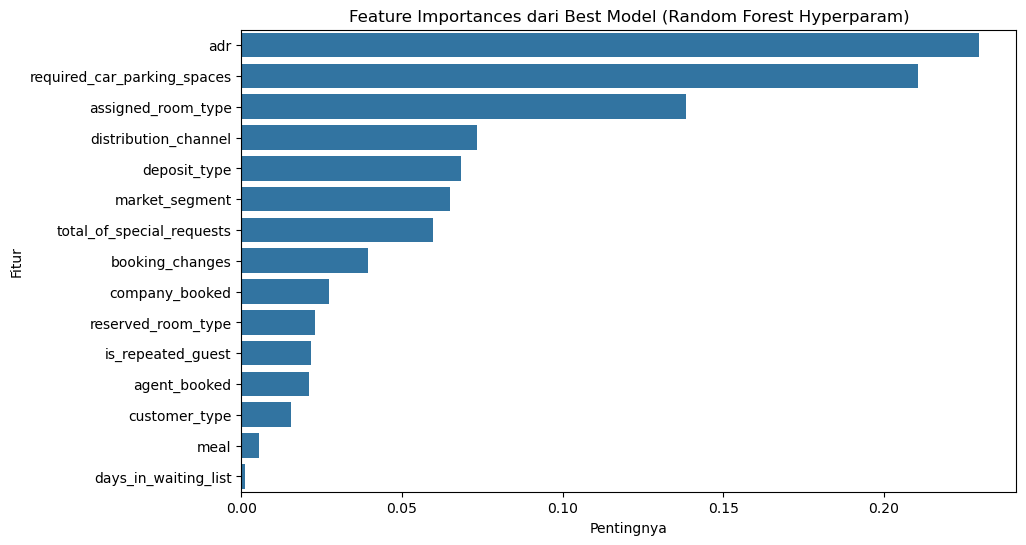

In [294]:
# Ekstrak model Random Forest terbaik dari pipeline
best_rf_model = best_model_resort.named_steps['model']

# Tentukan nama fitur (fitur numerik + fitur lainnya yang digunakan dalam model)
feature_names = numerical_features + list(X_train_resort.columns.difference(numerical_features))

# Hitung pentingnya fitur menggunakan atribut dari model Random Forest
importances = best_rf_model.feature_importances_

# Buat DataFrame untuk menyimpan nama fitur dan pentingnya fitur, lalu urutkan
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan DataFrame pentingnya fitur
display(feature_importances_df)

# Visualisasikan pentingnya fitur menggunakan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances dari Best Model (Random Forest Hyperparam)')
plt.xlabel('Pentingnya')
plt.ylabel('Fitur')
plt.show()


Berdasarkan hasil visualisasi *feature importance* dari model Random Forest, terdapat beberapa fitur atau kolom yang memiliki pengaruh besar dalam memprediksi pembatalan pemesanan hotel. Berikut adalah insight dari fitur-fitur yang paling berpengaruh tersebut:

1. **`adr` (Average Daily Rate)**:
   - Fitur ini memiliki pengaruh terbesar dalam model Random Forest. Hal ini menunjukkan bahwa semakin tinggi nilai `adr`, semakin besar kemungkinan terjadinya pembatalan. Ini dapat mengindikasikan bahwa pelanggan yang membayar harga lebih tinggi mungkin lebih cenderung untuk membatalkan pemesanan mereka jika mereka merasa tidak puas atau menemukan opsi lain yang lebih baik.

2. **`required_car_parking_spaces`**:
   - Jumlah ruang parkir yang diminta oleh pelanggan juga merupakan faktor penting. Pelanggan yang membutuhkan ruang parkir mungkin memiliki kebutuhan spesifik yang jika tidak terpenuhi, bisa menyebabkan pembatalan.

3. **`assigned_room_type`**:
   - Tipe kamar yang ditugaskan kepada pelanggan juga merupakan faktor penting. Perbedaan antara tipe kamar yang dipesan dan yang diberikan mungkin menyebabkan ketidakpuasan, yang kemudian bisa menyebabkan pembatalan.

4. **`distribution_channel`**:
   - Saluran distribusi tempat pelanggan memesan kamar juga memengaruhi keputusan pembatalan. Misalnya, pemesanan yang dilakukan melalui agen perjalanan online (OTA) mungkin memiliki tingkat pembatalan yang lebih tinggi dibandingkan dengan pemesanan langsung.

5. **`deposit_type`**:
   - Jenis deposit yang dipilih juga menjadi faktor penting. Ketentuan deposit yang lebih fleksibel atau kaku dapat memengaruhi keputusan pelanggan untuk melanjutkan atau membatalkan pemesanan.

6. **`market_segment`**:
   - Segmen pasar dari pelanggan juga mempengaruhi keputusan pembatalan. Misalnya, pelanggan yang berasal dari segmen tertentu, seperti bisnis atau grup, mungkin memiliki perilaku pembatalan yang berbeda dibandingkan dengan segmen lain.

7. **`total_of_special_requests`**:
   - Jumlah permintaan khusus yang diajukan oleh pelanggan juga memiliki pengaruh, meskipun tidak sebesar fitur-fitur lainnya. Semakin banyak permintaan khusus yang diajukan, semakin tinggi harapan pelanggan, yang jika tidak terpenuhi, bisa menyebabkan pembatalan.

Dari insight ini, terlihat bahwa fitur-fitur yang berkaitan dengan harga (adr), kebutuhan spesifik (required_car_parking_spaces), dan saluran pemesanan (distribution_channel) sangat penting dalam memprediksi pembatalan pemesanan hotel. Hotel dapat menggunakan informasi ini untuk mengembangkan strategi pencegahan pembatalan yang lebih efektif, seperti memberikan penawaran khusus untuk pelanggan dengan nilai adr tinggi atau memastikan kebutuhan parkir dipenuhi.


<hr>

## <center> Random Forest

<hr>

![image.png](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*i69vGs4AfhdhDUOlaPVLSA.png)


Pada kedua alat prediksi untuk City Hotel dan Resort Hotel menggunakan Random Forest. Random Forest merupakan suatu algoritma yang menggunakan decision tree untuk melangsungkan proses seleksi, di mana pohon decision tree akan dibagi secara rekursif berdasarkan data pada kelas yang sama. Oleh karena itu dengan menggunakan tree yang semakin banyak maka akan berpengaruh terhadap akurasi yang didapatkan menjadi lebih baik. Untuk prediksi klasifikasi pada Random Forest sendiri nantinya setiap pohon akan memberikan prediksi kelas. Prediksi akhir dari Random Forest dihasilkan dengan mengambil suara mayoritas dari semua pohon.

Pada Random Forest dapat dilakukan hyperparameter tuning dengan parameter :

- n_estimators: Jumlah pohon dalam hutan.
- max_depth: Kedalaman maksimum dari pohon keputusan.
- min_samples_split: Jumlah minimum sampel yang diperlukan untuk membagi sebuah node.
- min_samples_leaf: Jumlah minimum sampel yang diperlukan untuk menjadi leaf node (simpul daun).
- model_bootstrap: Apakah sampel bootstrap digunakan saat membuat pohon. Jika Salah, seluruh kumpulan data digunakan untuk membangun setiap pohon.

(Sumber : [Random Forest Classification](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

<hr>

## <center> Conclusion

<hr>

Kedua machine learning yang dibangun untuk memprediksi customer akan cancel terhadap pembookingan hotel yang dilakukan untuk City Hotel dan Resort Hotel menggunakan algoritma Random Forest Undersampling yang di hyperparameter tuning. Pada dataset City Hotel, model Random Forest Undersampling (Hyperparameter tuning) memiliki F2-Score sebesar 79.46% dan pada dataset Resort Hotel, model Random Forest Undersampling (Hyperparameter tuning) memiliki F2-Score sebesar 74.45% yang artinya model mampu memprediksi customer yang memiliki potensi untuk melakukan cancel pembookingan hotel sesuai dengan tujuan yang diinginkan oleh stakeholder. 

Dari business calculation maka dapat dihitung:
Dengan rata-rata harga kamar hotel Portugal: 98 Euro (Sumber : [Average Daily Hotel Rate Portugal](https://www.statista.com/statistics/545281/daily-hotel-rates-lisbon/#:~:text=This%20statistic%20shows%20the%20average,again%20in%202018%20and%202019.)), kita dapat menghitung potensi penghematan atau kerugian yang bisa dihindari dengan menggunakan model prediksi ini. Misalkan hotel mengalami rata-rata 100 cancelations per bulan, dan model prediksi ini mampu mengidentifikasi dengan akurasi F2-Score sebesar 79.46% untuk City Hotel dan 74.45% untuk Resort Hotel:

`City Hotel` :

Jumlah prediksi cancelation yang tepat: 79.46% dari 100 cancelations = 79.46 cancelations

Potensi penghematan per bulan: 79.46 cancelations * 98 Euro = 7,787.08 Euro

`Resort Hotel`:

Jumlah prediksi cancelation yang tepat: 74.45% dari 100 cancelations = 74.45 cancelations

Potensi penghematan per bulan: 74.45 cancelations * 98 Euro = 7,296.10 Euro

`Total Potensi Penghematan per Bulan untuk Kedua Hotel`:

City Hotel + Resort Hotel = 7,787.08 Euro + 7,296.10 Euro = 15,083.18 Euro
Dengan demikian, implementasi model prediksi ini berpotensi menghemat sekitar 15,083.18 Euro per bulan hanya dari memprediksi cancelation yang tepat dan mengambil tindakan yang sesuai, seperti menawarkan insentif atau menyesuaikan strategi penjualan. Ini menunjukkan nilai signifikan yang dapat diperoleh dari penggunaan model machine learning dalam pengambilan keputusan bisnis.

<hr>

## <center> Recommendation

<hr>

### **Rekomendasi untuk Machine Learning Pembatalan Pemesanan Hotel**

1. Dataset dapat ditambahkan dari bulan Januari 2015 - Desember 2017 yang kemungkinan bisa menjadi fitur seasonal yang dapat digunakan juga untuk memprediksi cancellation booking hotel.
2. Dapat mencoba untuk menggabungkan beberapa fitur pada dataset yang tersedia menjadi 1 fitur saja sehingga fitur baru tersebut dapat lebih merepresentasikan informasi yang mendalam dan mengurangi kompleksitas model.
3. Dapat mencoba proses pre-processing dengan metode lain yang mampu meningkatkan performa model.
4. Mencoba algoritma berbeda seperti Catboost atau Deep Learning.

<hr>

## <center> Model Limitation

<hr>

> ## City Hotel

In [307]:
data_train_city4_limit = data_train_city4.drop(
    columns=[
        'hotel', 
        'is_canceled',
        'arrival_date_year', 
        'arrival_date_month',
        'arrival_date_week_number',
        'arrival_date_day_of_month', 
        'reservation_status', 
        'reservation_status_date',
        'previous_cancellations',
        'previous_bookings_not_canceled',
        'company',
        'agent',
        'lead_time',
        'stays_in_weekend_nights',
        'stays_in_week_nights',
        'country',
        'adults',
        'children',
        'babies'
    ]
)


In [308]:
data_train_city4_limit.describe()

,is_repeated_guest,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000
mean,0.028377,0.238205,1.182426,111.373672,0.035484,0.706433
std,0.166051,0.675001,13.050311,41.294282,0.185134,0.833049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,84.600000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,105.300000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,133.200000,0.000000,1.000000
max,1.000000,18.000000,391.000000,510.000000,2.000000,5.000000


Model ini hanya dapat digunakan pada rentang data yang digunakan pada pemodelan ini yaitu:

| Feature                                      | Data Type  | Limitasi                                                                 |
|----------------------------------------------|------------|--------------------------------------------------------------------------|
| meal               | Categorical    | Nilai kategori meal berupa BB, SC, HB, FB     |
| market_segment                  | Categorical    | Nilai kategori market segment berupa Online TA, Offline TA/TO, Direct, Groups, Corporate, Complementary, Aviation, Undefined      |
| distribution_channel                           | Categorical| Nilai kategori distribution channel berupa TA/TO, Direct, Corporate, GDS, Undefined |
| is_repeated_guest                           | Integer| Nilai integer pemesanan yang berulang atau tidak di rentang 0-1                  |
| reserved_room_type                           | Categorical| Nilai kategori tipe kamar yang dipesan berupa A,B,C,D,E,F,G                 |
| assigned_room_type                                   | Categorical| Nilai kategori tipe kamar yang diberikan berupa A,B,C,D,E,F,G,K |
| booking_changes                                   | Integer| Nilai integer jumlah perubahan yang dilakukan di rentang 0-18         |
| deposit_type                               | Categorical| Nilai kategori dari tipe deposit yang berupa No Deposit, Refundable, Non Refund) |
| days_in_waiting_list                | Integer | Nilai integer jumlah hari di daftar tunggudi rentang 0-391                    |
| customer_type             | Categorical| Nilai kategori tipe customer berupa Transient, Transient-Party, Contract dan Group   |
| adr           | Float| Nilai float dari average daily rate di rentang 0-510                     |
| required_car_parking_spaces        | Integer| Nilai integer dari kebutuhan lapangan parkir mobil di rentang 0-2                  |
| total_of_special_requests          | Integer| Nilai integer dari jumlah permintaan khusus di rentang 0-5                                |

> ## Resort Hotel

In [311]:
data_train_resort2_limit = data_train_resort2.drop(
    columns=[
        'hotel', 
        'is_canceled',
        'arrival_date_year', 
        'arrival_date_month',
        'arrival_date_week_number',
        'arrival_date_day_of_month', 
        'reservation_status', 
        'reservation_status_date',
        'previous_cancellations',
        'previous_bookings_not_canceled',
        'company',
        'agent',
        'lead_time',
        'stays_in_weekend_nights',
        'stays_in_week_nights',
        'country',
        'adults',
        'children',
        'babies'
    ]
)


In [312]:
data_train_resort2_limit.describe()

,is_repeated_guest,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,25696.000000,25696.000000,25696.000000,25696.000000,25696.000000,25696.000000
mean,0.046077,0.307052,0.320789,99.764547,0.160531,0.683064
std,0.209656,0.753622,5.893459,63.252652,0.375075,0.834806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,52.200000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,17.000000,185.000000,450.000000,8.000000,5.000000


Model ini hanya dapat digunakan pada rentang data yang digunakan pada pemodelan ini yaitu:

| Feature                                      | Data Type  | Limitasi                                                                 |
|----------------------------------------------|------------|--------------------------------------------------------------------------|
| meal               | Categorical    | Nilai kategori meal berupa BB, SC, HB, FB     |
| market_segment                  | Categorical    | Nilai kategori market segment berupa Online TA, Offline TA/TO, Direct, Groups, Corporate, Complementary    |
| distribution_channel                           | Categorical| Nilai kategori distribution channel berupa TA/TO, Direct, Corporate, Undefined |
| is_repeated_guest                           | Integer| Nilai integer pemesanan yang berulang atau tidak di rentang 0-1                  |
| reserved_room_type                           | Categorical| Nilai kategori tipe kamar yang dipesan berupa A,B,C,D,E,F,G,H,L                 |
| assigned_room_type                                   | Categorical| Nilai kategori tipe kamar yang diberikan berupa A,B,C,D,E,F,G,H,I |
| booking_changes                                   | Integer| Nilai integer jumlah perubahan yang dilakukan di rentang 0-17         |
| deposit_type                               | Categorical| Nilai kategori dari tipe deposit yang berupa No Deposit, Refundable, Non Refund) |
| days_in_waiting_list                | Integer | Nilai integer jumlah hari di daftar tunggudi rentang 0-185                    |
| customer_type             | Categorical| Nilai kategori tipe customer berupa Transient, Transient-Party, Contract dan Group   |
| adr           | Float| Nilai float dari average daily rate di rentang 0-450                     |
| required_car_parking_spaces        | Integer| Nilai integer dari kebutuhan lapangan parkir mobil di rentang 0-2                  |
| total_of_special_requests          | Integer| Nilai integer dari jumlah permintaan khusus di rentang 0-5                                |

<hr>

## <center> Save Model

<hr>

In [477]:
# Library untuk menyimpan model
import pickle

# Pipeline Random Forest yang sudah di-training sebelumnya
pipeline_rf = best_model_city

# Save model ke dalam file .sav menggunakan pickle
pickle.dump(pipeline_rf, open('Random_Forest_City_Model.sav', 'wb'))

In [479]:
# Pipeline Random Forest yang sudah di-training sebelumnya
pipeline_rf_resort = best_model_resort

# Save model ke dalam file .sav menggunakan pickle
pickle.dump(pipeline_rf_resort, open('Random_Forest_Resort_Model.sav', 'wb'))